# Exploratory Data Analysis - MTA Data

## 1. Import Data from MTA website

In [759]:
import pandas as pd

In [760]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums: 
        file_url = url.format(week_num) 
        dfs.append(pd.read_csv(file_url)) 
    return pd.concat(dfs)


week_nums = [210109, 210116, 210123, 210130, 210206, 210213, 210220, 210227, 210306, 210313, 210320, 210327]
mta_df_weeks = get_data(week_nums)

In [761]:
from sqlalchemy import create_engine
import pandas as pd

In [762]:
engine = create_engine("sqlite:////Users/valentinarizzati/Desktop/mta.db")

In [763]:
engine.table_names()

['mta_data']

## 2. Preliminary Exploratory Data Analysis with SQLAlchemy

In [764]:
mta_df = pd.read_sql('SELECT * FROM mta_data;', engine)

In [765]:
mta_df

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,03:00:00,REGULAR,7511653,2558871
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,07:00:00,REGULAR,7511655,2558877
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,11:00:00,REGULAR,7511677,2558930
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,15:00:00,REGULAR,7511766,2558968
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,19:00:00,REGULAR,7511912,2558999
...,...,...,...,...,...,...,...,...,...,...,...
2509389,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,05:00:00,REGULAR,5554,544
2509390,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,09:00:00,REGULAR,5554,544
2509391,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,13:00:00,REGULAR,5554,544
2509392,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,17:00:00,REGULAR,5554,544


In [766]:
mta_df_1 = pd.read_sql('SELECT DISTINCT STATION, COUNT(DISTINCT DATE) AS COUNT_DATE, COUNT(DISTINCT TIME) AS COUNT_TIME FROM mta_data GROUP BY STATION ORDER BY COUNT_TIME DESC;', engine)

In [767]:
mta_df_1

,STATION,COUNT_DATE,COUNT_TIME
0,JOURNAL SQUARE,84,7558
1,PATH NEW WTC,84,7212
2,LACKAWANNA,84,6005
3,CITY / BUS,84,5755
4,GROVE STREET,84,5393
...,...,...,...
373,138/GRAND CONC,84,12
374,121 ST,84,12
375,116 ST-COLUMBIA,82,12
376,110 ST,84,12


All 378 stations have recorded data for 84 days. <br />
However, the table above presents much variability in the number of times recorded by station, which is likely due to the great variability in the number of turnstiles and observations per station. 

In [768]:
mta_df_2 = pd.read_sql('SELECT CA, UNIT, SCP, STATION, MIN(ENTRIES) AS MIN_ENTRIES, MAX(ENTRIES) AS MAX_EXITS, AVG(ENTRIES) AS AVG_ENTRIES FROM mta_data GROUP BY CA, UNIT, SCP, STATION ORDER BY MIN_ENTRIES;', engine)

In [769]:
mta_df_2

,CA,UNIT,SCP,STATION,MIN_ENTRIES,MAX_EXITS,AVG_ENTRIES
0,A002,R051,02-05-01,59 ST,0,0,0.000000e+00
1,A007,R079,01-05-01,5 AV/59 ST,0,262144,1.494915e+05
2,A011,R080,01-05-01,57 ST-7 AV,0,0,0.000000e+00
3,A013,R081,01-05-01,49 ST,0,0,0.000000e+00
4,A042,R086,01-00-04,PRINCE ST,0,11416,3.753137e+03
...,...,...,...,...,...,...,...
5032,R401,R445,00-00-00,3 AV 138 ST,2046215753,2046279587,2.046249e+09
5033,R729,R292,00-00-02,BAYCHESTER AV,2064015854,2064037962,2.064027e+09
5034,N400A,R359,02-00-03,COURT SQ,2066603442,2066611520,2.066608e+09
5035,R116,R030,00-00-02,CHAMBERS ST,2116101015,2116109528,2.116105e+09


Grouping by turnstile (i.e. combination of columns CA, UNIT, SCP, STATION), we notice that there are at least a few turnstiles presenting some occurrence of 0 entries. This issue must be further investigated in the data cleaning section below. 

In [770]:
mta_d3 = pd.read_sql('SELECT * FROM mta_data WHERE ENTRIES = 0;', engine)

In [771]:
mta_d3

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-05-01,59 ST,NQR456W,BMT,01/02/2021,03:00:00,REGULAR,0,889
1,A002,R051,02-05-01,59 ST,NQR456W,BMT,01/02/2021,07:00:00,REGULAR,0,889
2,A002,R051,02-05-01,59 ST,NQR456W,BMT,01/02/2021,11:00:00,REGULAR,0,889
3,A002,R051,02-05-01,59 ST,NQR456W,BMT,01/02/2021,15:00:00,REGULAR,0,889
4,A002,R051,02-05-01,59 ST,NQR456W,BMT,01/02/2021,19:00:00,REGULAR,0,889
...,...,...,...,...,...,...,...,...,...,...,...
35274,R728,R226,00-05-01,GUN HILL RD,5,IRT,03/26/2021,04:00:00,REGULAR,0,12
35275,R728,R226,00-05-01,GUN HILL RD,5,IRT,03/26/2021,08:00:00,REGULAR,0,12
35276,R728,R226,00-05-01,GUN HILL RD,5,IRT,03/26/2021,12:00:00,REGULAR,0,12
35277,R728,R226,00-05-01,GUN HILL RD,5,IRT,03/26/2021,16:00:00,REGULAR,0,12


There are indeed more than 35000 records in the database presenting zero ENTRIES. However, this might include duplicate records that must be cleaned. <br />
At the same time, we notice a consistent frequency in the value in the EXITS column for the turnstiles showing a 0 in the ENTRIES column. It's an interesting trend and deserves to be explored further. 

In [772]:
mta_df_4 = pd.read_sql('SELECT CA, UNIT, SCP, STATION, COUNT(ENTRIES) AS COUNT_NULL_ENTRIES FROM mta_data GROUP BY CA, UNIT, SCP, STATION HAVING ENTRIES = 0 ORDER BY COUNT_NULL_ENTRIES DESC;', engine)

In [773]:
mta_df_4

,CA,UNIT,SCP,STATION,COUNT_NULL_ENTRIES
0,N605,R024,00-05-01,SUTPHIN-ARCHER,595
1,N405,R239,00-03-01,GREENPOINT AV,544
2,R728,R226,00-05-01,GUN HILL RD,525
3,R194,R040,00-05-01,231 ST,516
4,N506,R022,00-06-01,34 ST-HERALD SQ,512
...,...,...,...,...,...
66,A007,R079,01-05-01,5 AV/59 ST,491
67,PTH17,R541,01-00-00,THIRTY THIRD ST,481
68,R423,R429,00-05-01,PELHAM BAY PARK,481
69,R228,R143,00-05-01,28 ST,432


There are 71 turnstiles presenting a null value for ENTRIES. This might be due to the fact that these turnstiles are located in remote areas and are then characterized by low foot traffic. 

In [774]:
sum_count_null = sum(mta_df_4.COUNT_NULL_ENTRIES)

In [775]:
sum_count_null

35500

The fact that the sum of the null ENTRIES (35500) is greater than 35279, the number of records for which ENTRIES is zero, is an indication that there might be duplicates and inconsistent values in the data that must be cleaned. 

In [776]:
mta_df_5 = pd.read_sql('SELECT * FROM mta_data WHERE STATION = "59 ST" AND ENTRIES = 0;', engine)

In [777]:
mta_df_5 

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-05-01,59 ST,NQR456W,BMT,01/02/2021,03:00:00,REGULAR,0,889
1,A002,R051,02-05-01,59 ST,NQR456W,BMT,01/02/2021,07:00:00,REGULAR,0,889
2,A002,R051,02-05-01,59 ST,NQR456W,BMT,01/02/2021,11:00:00,REGULAR,0,889
3,A002,R051,02-05-01,59 ST,NQR456W,BMT,01/02/2021,15:00:00,REGULAR,0,889
4,A002,R051,02-05-01,59 ST,NQR456W,BMT,01/02/2021,19:00:00,REGULAR,0,889
...,...,...,...,...,...,...,...,...,...,...,...
497,A002,R051,02-05-01,59 ST,NQR456W,BMT,03/26/2021,04:00:00,REGULAR,0,900
498,A002,R051,02-05-01,59 ST,NQR456W,BMT,03/26/2021,08:00:00,REGULAR,0,900
499,A002,R051,02-05-01,59 ST,NQR456W,BMT,03/26/2021,12:00:00,REGULAR,0,900
500,A002,R051,02-05-01,59 ST,NQR456W,BMT,03/26/2021,16:00:00,REGULAR,0,900


The new dataframe isolates data for the '59 ST' STATION and presents 502 occurrences with 0 ENTRIES. 

In [778]:
mta_df_6 = pd.read_sql('SELECT * FROM mta_data WHERE EXITS = 0;', engine)

In [779]:
mta_df_6

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-05-00,59 ST,NQR456W,BMT,01/02/2021,03:00:00,REGULAR,524397,0
1,A002,R051,02-05-00,59 ST,NQR456W,BMT,01/02/2021,07:00:00,REGULAR,524397,0
2,A002,R051,02-05-00,59 ST,NQR456W,BMT,01/02/2021,11:00:00,REGULAR,524397,0
3,A002,R051,02-05-00,59 ST,NQR456W,BMT,01/02/2021,15:00:00,REGULAR,524397,0
4,A002,R051,02-05-00,59 ST,NQR456W,BMT,01/02/2021,19:00:00,REGULAR,524397,0
...,...,...,...,...,...,...,...,...,...,...,...
100134,TRAM1,R468,00-05-00,RIT-MANHATTAN,R,RIT,03/26/2021,05:00:00,REGULAR,504,0
100135,TRAM1,R468,00-05-00,RIT-MANHATTAN,R,RIT,03/26/2021,09:00:00,REGULAR,504,0
100136,TRAM1,R468,00-05-00,RIT-MANHATTAN,R,RIT,03/26/2021,13:00:00,REGULAR,504,0
100137,TRAM1,R468,00-05-00,RIT-MANHATTAN,R,RIT,03/26/2021,17:00:00,REGULAR,505,0


There are more than 100000 records for which the EXITS column is zero. However, some of these turnstiles (e.g. record at row 0 above) present a significant amount of ENTRIES. This looks odd - why would a turnstile have cumulatively more than 500000 ENTRIES and 0 EXITS? Further investigation of the data is needed to uncover potential inconsistencies.

## 3. Exploratory Data Analysis in Pandas

### 3.1 Explore Data

In [780]:
mta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509394 entries, 0 to 2509393
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   CA        object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 210.6+ MB


In [781]:
mta_df.describe()

,ENTRIES,EXITS
count,2.509394e+06,2.509394e+06
mean,4.234115e+07,3.404588e+07
std,2.191039e+08,1.948275e+08
min,0.000000e+00,0.000000e+00
25%,2.266820e+05,9.428600e+04
50%,1.529380e+06,9.116270e+05
75%,6.191010e+06,4.060408e+06
max,2.128720e+09,2.123067e+09


In [782]:
mta_df.columns

Index(['CA', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [783]:
mta_df.head(10)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,03:00:00,REGULAR,7511653,2558871
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,07:00:00,REGULAR,7511655,2558877
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,11:00:00,REGULAR,7511677,2558930
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,15:00:00,REGULAR,7511766,2558968
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,19:00:00,REGULAR,7511912,2558999
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,23:00:00,REGULAR,7511996,2559007
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/03/2021,03:00:00,REGULAR,7512008,2559008
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/03/2021,07:00:00,REGULAR,7512011,2559013
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/03/2021,11:00:00,REGULAR,7512031,2559034
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/03/2021,15:00:00,REGULAR,7512079,2559063


In [784]:
mta_df.tail(10)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
2509384,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/25/2021,09:00:00,REGULAR,5554,544
2509385,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/25/2021,13:00:00,REGULAR,5554,544
2509386,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/25/2021,17:00:00,REGULAR,5554,544
2509387,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/25/2021,21:00:00,REGULAR,5554,544
2509388,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,01:00:00,REGULAR,5554,544
2509389,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,05:00:00,REGULAR,5554,544
2509390,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,09:00:00,REGULAR,5554,544
2509391,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,13:00:00,REGULAR,5554,544
2509392,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,17:00:00,REGULAR,5554,544
2509393,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,21:00:00,REGULAR,5554,544


In [785]:
# Checking that DESC has only 2 types of values (REGULAR and RECOVR AUD)
mta_df.DESC.describe()

count     2509394
unique          2
top       REGULAR
freq      2498802
Name: DESC, dtype: object

In [786]:
type(mta_df.ENTRIES)

pandas.core.series.Series

In [787]:
mta_df.ENTRIES.describe()

count    2.509394e+06
mean     4.234115e+07
std      2.191039e+08
min      0.000000e+00
25%      2.266820e+05
50%      1.529380e+06
75%      6.191010e+06
max      2.128720e+09
Name: ENTRIES, dtype: float64

In [788]:
mta_df.EXITS.describe()

count    2.509394e+06
mean     3.404588e+07
std      1.948275e+08
min      0.000000e+00
25%      9.428600e+04
50%      9.116270e+05
75%      4.060408e+06
max      2.123067e+09
Name: EXITS, dtype: float64

In [789]:
mta_df.ENTRIES.mean()

42341153.375484675

In [790]:
mta_df.ENTRIES.max()

2128719661

In [791]:
mta_df.ENTRIES.min()

0

In [792]:
mta_df.EXITS.mean()

34045882.44718725

In [793]:
mta_df.EXITS.max()

2123067117

In [794]:
mta_df.EXITS.min()

0

In [795]:
mta_df.STATION.value_counts()

34 ST-PENN STA     51249
FULTON ST          48307
GRD CNTRL-42 ST    44907
23 ST              36808
86 ST              32693
                   ...  
182-183 STS         1503
CHAUNCEY ST         1501
CYPRESS HILLS       1498
CLEVELAND ST        1008
SUTTER AV            999
Name: STATION, Length: 378, dtype: int64

### 3.2 Filter Data

In [796]:
mask_23_ST = (mta_df.STATION == '23 ST')

In [797]:
mask_23_ST

0          False
1          False
2          False
3          False
4          False
           ...  
2509389    False
2509390    False
2509391    False
2509392    False
2509393    False
Name: STATION, Length: 2509394, dtype: bool

In [798]:
mta_df[mask_23_ST].head(20)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
4321,A030,R083,01-00-00,23 ST,NRW,BMT,01/02/2021,03:00:00,REGULAR,45860,49742
4322,A030,R083,01-00-00,23 ST,NRW,BMT,01/02/2021,07:00:00,REGULAR,45860,49752
4323,A030,R083,01-00-00,23 ST,NRW,BMT,01/02/2021,11:00:00,REGULAR,45869,49796
4324,A030,R083,01-00-00,23 ST,NRW,BMT,01/02/2021,15:00:00,REGULAR,45917,49890
4325,A030,R083,01-00-00,23 ST,NRW,BMT,01/02/2021,19:00:00,REGULAR,46046,49983
4326,A030,R083,01-00-00,23 ST,NRW,BMT,01/02/2021,23:00:00,REGULAR,46088,50003
4327,A030,R083,01-00-00,23 ST,NRW,BMT,01/03/2021,03:00:00,REGULAR,46090,50005
4328,A030,R083,01-00-00,23 ST,NRW,BMT,01/03/2021,07:00:00,REGULAR,46092,50009
4329,A030,R083,01-00-00,23 ST,NRW,BMT,01/03/2021,11:00:00,REGULAR,46100,50049
4330,A030,R083,01-00-00,23 ST,NRW,BMT,01/03/2021,15:00:00,REGULAR,46132,50117


In [799]:
mta_df[(mta_df.STATION == '23 ST') & (mta_df.ENTRIES > 0)]

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
4321,A030,R083,01-00-00,23 ST,NRW,BMT,01/02/2021,03:00:00,REGULAR,45860,49742
4322,A030,R083,01-00-00,23 ST,NRW,BMT,01/02/2021,07:00:00,REGULAR,45860,49752
4323,A030,R083,01-00-00,23 ST,NRW,BMT,01/02/2021,11:00:00,REGULAR,45869,49796
4324,A030,R083,01-00-00,23 ST,NRW,BMT,01/02/2021,15:00:00,REGULAR,45917,49890
4325,A030,R083,01-00-00,23 ST,NRW,BMT,01/02/2021,19:00:00,REGULAR,46046,49983
...,...,...,...,...,...,...,...,...,...,...,...
2458374,R227A,R131,01-06-01,23 ST,6,IRT,03/26/2021,05:00:00,REGULAR,556981,127863
2458375,R227A,R131,01-06-01,23 ST,6,IRT,03/26/2021,09:00:00,REGULAR,556986,127891
2458376,R227A,R131,01-06-01,23 ST,6,IRT,03/26/2021,13:00:00,REGULAR,556986,127913
2458377,R227A,R131,01-06-01,23 ST,6,IRT,03/26/2021,17:00:00,REGULAR,557010,127945


The STATION 23 ST has no records for which ENTRIES is zero. In fact, the length of this mask (36808 rows) equals the result of the value_counts (36808) for the STATION 23 ST. 

### 3.3 Data Cleaning

In [800]:
mta_df.columns = [column.strip() for column in mta_df.columns]
mta_df.columns

Index(['CA', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [801]:
mta_df.DATE.value_counts().sort_index()

01/02/2021    30595
01/03/2021    29807
01/04/2021    29779
01/05/2021    29802
01/06/2021    30021
              ...  
03/22/2021    29988
03/23/2021    30005
03/24/2021    29863
03/25/2021    29992
03/26/2021    29870
Name: DATE, Length: 84, dtype: int64

#### 3.3.1 Create DATE_TIME column and rearrage the dataframe

In [802]:
import datetime

In [803]:
# Create a new variable DATE_TIME to check for duplicates
mta_df["DATE_TIME"] = pd.to_datetime(mta_df.DATE + " " + mta_df.TIME, format="%m/%d/%Y %H:%M:%S")

In [804]:
mta_df

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,03:00:00,REGULAR,7511653,2558871,2021-01-02 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,07:00:00,REGULAR,7511655,2558877,2021-01-02 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,11:00:00,REGULAR,7511677,2558930,2021-01-02 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,15:00:00,REGULAR,7511766,2558968,2021-01-02 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,19:00:00,REGULAR,7511912,2558999,2021-01-02 19:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2509389,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,05:00:00,REGULAR,5554,544,2021-03-26 05:00:00
2509390,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,09:00:00,REGULAR,5554,544,2021-03-26 09:00:00
2509391,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,13:00:00,REGULAR,5554,544,2021-03-26 13:00:00
2509392,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,17:00:00,REGULAR,5554,544,2021-03-26 17:00:00


In [805]:
mta_df = mta_df[['CA', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME', 'DATE_TIME',
       'DESC', 'ENTRIES', 'EXITS']]

In [806]:
mta_df

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DATE_TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,03:00:00,2021-01-02 03:00:00,REGULAR,7511653,2558871
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,07:00:00,2021-01-02 07:00:00,REGULAR,7511655,2558877
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,11:00:00,2021-01-02 11:00:00,REGULAR,7511677,2558930
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,15:00:00,2021-01-02 15:00:00,REGULAR,7511766,2558968
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,19:00:00,2021-01-02 19:00:00,REGULAR,7511912,2558999
...,...,...,...,...,...,...,...,...,...,...,...,...
2509389,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,05:00:00,2021-03-26 05:00:00,REGULAR,5554,544
2509390,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,09:00:00,2021-03-26 09:00:00,REGULAR,5554,544
2509391,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,13:00:00,2021-03-26 13:00:00,REGULAR,5554,544
2509392,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,17:00:00,2021-03-26 17:00:00,REGULAR,5554,544


#### 3.3.2 Check for duplicates by turnstile and by DATE_TIME

In [807]:
# Mask by turnstile and DATE_TIME
(mta_df
 .groupby(["CA", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(10)

,CA,UNIT,SCP,STATION,DATE_TIME,ENTRIES
768235,N100,R252,00-00-00,HIGH ST,2021-03-08 11:00:00,2
801421,N114,R297,01-00-01,FRANKLIN AV,2021-03-10 08:00:00,2
1689106,R145,R032,00-00-02,TIMES SQ-42 ST,2021-02-04 15:00:00,2
1689105,R145,R032,00-00-02,TIMES SQ-42 ST,2021-02-04 11:00:00,2
1689104,R145,R032,00-00-02,TIMES SQ-42 ST,2021-02-04 07:00:00,2
1689103,R145,R032,00-00-02,TIMES SQ-42 ST,2021-02-04 03:00:00,2
1689102,R145,R032,00-00-02,TIMES SQ-42 ST,2021-02-03 23:00:00,2
1689101,R145,R032,00-00-02,TIMES SQ-42 ST,2021-02-03 19:00:00,2
1689100,R145,R032,00-00-02,TIMES SQ-42 ST,2021-02-03 15:00:00,2
1689099,R145,R032,00-00-02,TIMES SQ-42 ST,2021-02-03 11:00:00,2


There are at least 10 duplicates in the dataframe.

In [808]:
# Mask filtering data for a specific turnstile at TIMES_SQ_42_ST, which is a very busy MTA station
mask_TIMES_SQ_42_ST = ((mta_df["CA"] == "R145") & 
(mta_df["UNIT"] == "R032") & 
(mta_df["SCP"] == "00-00-02") & 
(mta_df["STATION"] == "TIMES SQ-42 ST") &
(mta_df["DATE_TIME"].dt.date == datetime.datetime(2021, 2, 4).date()))

mta_df[mask_TIMES_SQ_42_ST].head(10)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DATE_TIME,DESC,ENTRIES,EXITS
978417,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,IRT,02/04/2021,03:00:00,2021-02-04 03:00:00,REGULAR,6196649,2790991
978418,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,IRT,02/04/2021,03:00:00,2021-02-04 03:00:00,RECOVR AUD,860254,976394
978419,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,IRT,02/04/2021,07:00:00,2021-02-04 07:00:00,REGULAR,6196662,2790993
978420,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,IRT,02/04/2021,07:00:00,2021-02-04 07:00:00,RECOVR AUD,860306,976446
978421,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,IRT,02/04/2021,11:00:00,2021-02-04 11:00:00,REGULAR,6196696,2791039
978422,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,IRT,02/04/2021,11:00:00,2021-02-04 11:00:00,RECOVR AUD,860403,976751
978423,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,IRT,02/04/2021,15:00:00,2021-02-04 15:00:00,REGULAR,6196732,2791065
978424,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,IRT,02/04/2021,15:00:00,2021-02-04 15:00:00,RECOVR AUD,860469,976910
978425,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,IRT,02/04/2021,19:00:00,2021-02-04 19:00:00,REGULAR,6196856,2791109
978426,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,IRT,02/04/2021,19:00:00,2021-02-04 19:00:00,RECOVR AUD,860601,977160


There seems to be a lot of RECOVR AUD for the TIMES SQ-42 ST station, which is not surprising because it's one of the busiest stations in NYC. <br />
In this case, the RECOVR AUD line shows an number of entries and exits significantly lower than the number presented in the REGULAR line for the same DATE_TIME. 

In [809]:
mta_df.DESC.value_counts()

REGULAR       2498802
RECOVR AUD      10592
Name: DESC, dtype: int64

In [810]:
# Mask filtering data for a specific turnstile at HIGH_ST, a less busy MTA station than TIMES_SQ_42_ST
mask_HIGH_ST = ((mta_df["CA"] == "N100") & 
(mta_df["UNIT"] == "R252") & 
(mta_df["SCP"] == "00-00-00") & 
(mta_df["STATION"] == "HIGH ST") &
(mta_df["DATE_TIME"].dt.date == datetime.datetime(2021, 3, 8).date()))

mta_df[mask_HIGH_ST].head(10)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DATE_TIME,DESC,ENTRIES,EXITS
1947741,N100,R252,00-00-00,HIGH ST,AC,IND,03/08/2021,03:00:00,2021-03-08 03:00:00,REGULAR,817578,1729820
1947742,N100,R252,00-00-00,HIGH ST,AC,IND,03/08/2021,03:00:00,2021-03-08 03:00:00,RECOVR AUD,818272,1731687
1947743,N100,R252,00-00-00,HIGH ST,AC,IND,03/08/2021,07:00:00,2021-03-08 07:00:00,REGULAR,817584,1729881
1947744,N100,R252,00-00-00,HIGH ST,AC,IND,03/08/2021,07:00:00,2021-03-08 07:00:00,RECOVR AUD,818272,1731687
1947745,N100,R252,00-00-00,HIGH ST,AC,IND,03/08/2021,11:00:00,2021-03-08 11:00:00,REGULAR,817651,1730181
1947746,N100,R252,00-00-00,HIGH ST,AC,IND,03/08/2021,11:00:00,2021-03-08 11:00:00,RECOVR AUD,818272,1731687
1947747,N100,R252,00-00-00,HIGH ST,AC,IND,03/08/2021,15:00:00,2021-03-08 15:00:00,REGULAR,817735,1730344
1947748,N100,R252,00-00-00,HIGH ST,AC,IND,03/08/2021,15:00:00,2021-03-08 15:00:00,RECOVR AUD,818272,1731687
1947749,N100,R252,00-00-00,HIGH ST,AC,IND,03/08/2021,19:00:00,2021-03-08 19:00:00,REGULAR,817964,1730569
1947750,N100,R252,00-00-00,HIGH ST,AC,IND,03/08/2021,19:00:00,2021-03-08 19:00:00,RECOVR AUD,818272,1731687


Differently than the TIMES SQ-42 ST station, for the HIGH ST station, the RECOVR AUD line shows an number of entries and exits that is very similar to the number presented in the REGULAR line for the same DATE_TIME.

The different behavior of ENTRIES and EXITS across REGULAR and RECOVR AUD types of DESC for TIMES SQ-42 ST and HIGH ST stations suggest that there might be a few different ways to deal with the RECOVR AUD duplicate rows:<br /> 
- For stations like HIGH ST we might feel comfortable just dropping the RECOVR AUD line because the number of ENTRIES and EXITS ARE anyways very similar to the REGULAR line<br />
- For stations like TIMES SQ-42 ST we might instead consider summing the ENTRIES and EXITS in the RECOVR AUD line to respectively ENTRIES and EXITS of the REGULAR line for the same DATE_TIME.

Due to the lack of specific metadata suggesting otherwise and to the macro dimension of this project (i.e. we will not be looking at every single turnstile specifically but the relevant level of aggregation in our scope will be STATION), we will take the consistent approach of dropping duplicate RECOVR AUD rows by DATE_TIME for all stations.

In [811]:
# Drop duplicates
mta_df.sort_values(["CA", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)
mta_df.drop_duplicates(subset=["CA", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [812]:
# Sanity check to make sure all duplicates have been dropped
(mta_df
 .groupby(["CA", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,CA,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-01-02 03:00:00,1
1672892,R138,R293,00-03-04,34 ST-PENN STA,2021-01-15 05:00:00,1
1672885,R138,R293,00-03-04,34 ST-PENN STA,2021-01-14 01:00:00,1
1672886,R138,R293,00-03-04,34 ST-PENN STA,2021-01-14 05:00:00,1
1672887,R138,R293,00-03-04,34 ST-PENN STA,2021-01-14 09:00:00,1


In [813]:
mta_df.DESC.value_counts()

REGULAR       2498802
RECOVR AUD      10531
Name: DESC, dtype: int64

In [814]:
(mta_df
 .groupby(["CA", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .EXITS.count()
 .reset_index()
 .sort_values("EXITS", ascending=False)).head(5)

,CA,UNIT,SCP,STATION,DATE_TIME,EXITS
0,A002,R051,02-00-00,59 ST,2021-01-02 03:00:00,1
1672892,R138,R293,00-03-04,34 ST-PENN STA,2021-01-15 05:00:00,1
1672885,R138,R293,00-03-04,34 ST-PENN STA,2021-01-14 01:00:00,1
1672886,R138,R293,00-03-04,34 ST-PENN STA,2021-01-14 05:00:00,1
1672887,R138,R293,00-03-04,34 ST-PENN STA,2021-01-14 09:00:00,1


We have successfully eliminated duplicate entries.

#### 3.3.3 Check for missing values

In [815]:
mta_df.isna().head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DATE_TIME,DESC,ENTRIES,EXITS
2509393,False,False,False,False,False,False,False,False,False,False,False,False
2509392,False,False,False,False,False,False,False,False,False,False,False,False
2509391,False,False,False,False,False,False,False,False,False,False,False,False
2509390,False,False,False,False,False,False,False,False,False,False,False,False
2509389,False,False,False,False,False,False,False,False,False,False,False,False


In [816]:
mta_df.isna().sum()

CA           0
UNIT         0
SCP          0
STATION      0
LINENAME     0
DIVISION     0
DATE         0
TIME         0
DATE_TIME    0
DESC         0
ENTRIES      0
EXITS        0
dtype: int64

There are no missing values in this dataset. 

#### 3.3.3 Check for outliers

See below in section 4.1.1 and 4.2.1. The check for outliers should be applied to the daily counts of entries and exits (i.e. DAILY_ENTRIES and DAILY_EXITS as defined below), instead of the cumulative value of entries and exits in a day (i.e. ENTRIES and EXITS as initially defined in the dataset). 

#### 3.3.4 Check for zeros

In [817]:
# Mask for all records for which ENTRIES is equal to 0
mask_ENTRIES_zeros = (mta_df.ENTRIES == 0)
mask_ENTRIES_zeros

2509393    False
2509392    False
2509391    False
2509390    False
2509389    False
           ...  
4          False
3          False
2          False
1          False
0          False
Name: ENTRIES, Length: 2509333, dtype: bool

In [818]:
mta_df[mask_ENTRIES_zeros]

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DATE_TIME,DESC,ENTRIES,EXITS
2507293,R728,R226,00-05-01,GUN HILL RD,5,IRT,03/26/2021,20:00:00,2021-03-26 20:00:00,REGULAR,0,12
2507292,R728,R226,00-05-01,GUN HILL RD,5,IRT,03/26/2021,16:00:00,2021-03-26 16:00:00,REGULAR,0,12
2507291,R728,R226,00-05-01,GUN HILL RD,5,IRT,03/26/2021,12:00:00,2021-03-26 12:00:00,REGULAR,0,12
2507290,R728,R226,00-05-01,GUN HILL RD,5,IRT,03/26/2021,08:00:00,2021-03-26 08:00:00,REGULAR,0,12
2507289,R728,R226,00-05-01,GUN HILL RD,5,IRT,03/26/2021,04:00:00,2021-03-26 04:00:00,REGULAR,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...
424,A002,R051,02-05-01,59 ST,NQR456W,BMT,01/02/2021,19:00:00,2021-01-02 19:00:00,REGULAR,0,889
423,A002,R051,02-05-01,59 ST,NQR456W,BMT,01/02/2021,15:00:00,2021-01-02 15:00:00,REGULAR,0,889
422,A002,R051,02-05-01,59 ST,NQR456W,BMT,01/02/2021,11:00:00,2021-01-02 11:00:00,REGULAR,0,889
421,A002,R051,02-05-01,59 ST,NQR456W,BMT,01/02/2021,07:00:00,2021-01-02 07:00:00,REGULAR,0,889


As shown in section 2 above, and again here, there are 35279 records for which ENTRIES is equal to zero. 

In [819]:
# Mask for all records for which both ENTRIES and EXITS are equal to 0
zero_cols = ['ENTRIES', 'EXITS']
mta_df_zero_enex = mta_df[mta_df[zero_cols].eq(0).all(1)]

In [820]:
mta_df_zero_enex

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DATE_TIME,DESC,ENTRIES,EXITS
1239884,R532,R328,00-06-02,METS-WILLETS PT,7,IRT,02/09/2021,00:00:00,2021-02-09 00:00:00,REGULAR,0,0
1239883,R532,R328,00-06-02,METS-WILLETS PT,7,IRT,02/08/2021,20:00:00,2021-02-08 20:00:00,REGULAR,0,0
1239882,R532,R328,00-06-02,METS-WILLETS PT,7,IRT,02/08/2021,16:00:00,2021-02-08 16:00:00,REGULAR,0,0
172444,R284,R243,00-06-01,170 ST,4,IRT,01/05/2021,15:00:00,2021-01-05 15:00:00,REGULAR,0,0
172443,R284,R243,00-06-01,170 ST,4,IRT,01/05/2021,11:00:00,2021-01-05 11:00:00,REGULAR,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1288669,H007A,R248,02-05-00,1 AV,L,BMT,02/17/2021,11:00:00,2021-02-17 11:00:00,REGULAR,0,0
1288668,H007A,R248,02-05-00,1 AV,L,BMT,02/17/2021,07:00:00,2021-02-17 07:00:00,REGULAR,0,0
1288667,H007A,R248,02-05-00,1 AV,L,BMT,02/17/2021,03:00:00,2021-02-17 03:00:00,REGULAR,0,0
1288666,H007A,R248,02-05-00,1 AV,L,BMT,02/16/2021,23:00:00,2021-02-16 23:00:00,RECOVR AUD,0,0


There are 913 records for which both ENTRIES and EXITS are zeros. 

In [821]:
turnstiles_all_zeros = mta_df_zero_enex.groupby(['CA', 'UNIT', 'SCP','STATION']).count()
turnstiles_all_zeros

LINENAME  DIVISION  DATE  TIME  \
CA    UNIT SCP      STATION                                           
A042  R086 01-00-04 PRINCE ST               1         1     1     1   
H007A R248 02-05-00 1 AV                    4         4     4     4   
N012  R035 01-05-00 168 ST                147       147   147   147   
N114  R297 01-05-01 FRANKLIN AV             1         1     1     1   
N181A R464 00-05-00 AQUEDUCT RACETR       240       240   240   240   
PTH02 R544 00-06-00 HARRISON                1         1     1     1   
PTH03 R552 00-01-01 JOURNAL SQUARE          2         2     2     2   
           00-05-03 JOURNAL SQUARE          1         1     1     1   
PTH04 R551 00-04-04 GROVE STREET            1         1     1     1   
PTH11 R545 00-00-02 14TH STREET             3         3     3     3   
PTH13 R541 00-00-00 THIRTY ST               1         1     1     1   
PTH17 R541 01-00-00 THIRTY THIRD ST       480       480   480   480   
PTH21 R540 01-00-02 PATH WTC 2              1         1     1     1   
PTH22 R540 00-00-00 PATH NEW WTC            1         1     1     1   
           00-00-07 PATH NEW WTC            1         1     1     1   
           00-01-04 PATH NEW WTC            1         1     1     1   
           00-05-01 PATH NEW WTC            1         1     1     1   
R205A R014 04-05-00 FULTON ST               1         1     1     1   
R284  R243 00-06-01 170 ST                 22        22    22    22   
R532  R328 00-06-02 METS-WILLETS PT         3         3     3     3   

                                     DATE_TIME  DESC  ENTRIES  EXITS  
CA    UNIT SCP      STATION                                           
A042  R086 01-00-04 PRINCE ST                1     1        1      1  
H007A R248 02-05-00 1 AV                     4     4        4      4  
N012  R035 01-05-00 168 ST                 147   147      147    147  
N114  R297 01-05-01 FRANKLIN AV              1     1        1      1  
N181A R464 00-05-00 AQUEDUCT RACETR        240   240      240    240  
PTH02 R544 00-06-00 HARRISON                 1     1        1      1  
PTH03 R552 00-01-01 JOURNAL SQUARE           2     2        2      2  
           00-05-03 JOURNAL SQUARE           1     1        1      1  
PTH04 R551 00-04-04 GROVE STREET             1     1        1      1  
PTH11 R545 00-00-02 14TH STREET              3     3        3      3  
PTH13 R541 00-00-00 THIRTY ST                1     1        1      1  
PTH17 R541 01-00-00 THIRTY THIRD ST        480   480      480    480  
PTH21 R540 01-00-02 PATH WTC 2               1     1        1      1  
PTH22 R540 00-00-00 PATH NEW WTC             1     1        1      1  
           00-00-07 PATH NEW WTC             1     1        1      1  
           00-01-04 PATH NEW WTC             1     1        1      1  
           00-05-01 PATH NEW WTC             1     1        1      1  
R205A R014 04-05-00 FULTON ST                1     1        1      1  
R284  R243 00-06-01 170 ST                  22    22       22     22  
R532  R328 00-06-02 METS-WILLETS PT          3     3        3      3

In [822]:
turnstiles_all_zeros.shape

(20, 8)

There are 20 turnstiles for which both ENTRIES or EXITS are zeros. Three of them - 168 ST, AQUEDUCT RACETR, THIRTY THIRD ST - present the majority of zeros in both ENTRIES and EXITS. <br />
However, in this case, zero ENTRIES and EXITS still present a useful information in terms of very low foot traffic in the corresponding area. Due to the lack of metadata to suggest the need of a different treatment to the data, rows that display zeros in both ENTRIES and EXITS won't be dropped. 

## 4. Data Manipulation and Modeling

### 4.1 Compute Daily Entries by Station

#### 4.1.1 Define variable Daily Entries

In [823]:
# For the purpose of this project, "day" is the right level of aggregation by time
turnstiles_daily_entries = (mta_df
                        .groupby(["CA", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [824]:
turnstiles_daily_entries.head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,01/02/2021,7511996
1,A002,R051,02-00-00,59 ST,01/03/2021,7512214
2,A002,R051,02-00-00,59 ST,01/04/2021,7512754
3,A002,R051,02-00-00,59 ST,01/05/2021,7513300
4,A002,R051,02-00-00,59 ST,01/06/2021,7513790


In [825]:
# Create PREV_DATE and PREV_ENTRIES columns to facilitate the subtration between ENTRIES in subsequent DATE_TIME intervals
turnstiles_daily_entries[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily_entries
                                                       .groupby(["CA", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES"]]
                                                       .shift(1))

In [826]:
turnstiles_daily_entries.head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,01/02/2021,7511996,NaN,NaN
1,A002,R051,02-00-00,59 ST,01/03/2021,7512214,01/02/2021,7511996.0
2,A002,R051,02-00-00,59 ST,01/04/2021,7512754,01/03/2021,7512214.0
3,A002,R051,02-00-00,59 ST,01/05/2021,7513300,01/04/2021,7512754.0
4,A002,R051,02-00-00,59 ST,01/06/2021,7513790,01/05/2021,7513300.0


In [827]:
turnstiles_daily_entries.tail()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
419032,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/22/2021,5554,03/21/2021,5554.0
419033,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/23/2021,5554,03/22/2021,5554.0
419034,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/24/2021,5554,03/23/2021,5554.0
419035,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/25/2021,5554,03/24/2021,5554.0
419036,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/26/2021,5554,03/25/2021,5554.0


In [828]:
# Drop all missing values in the column PREV_DATE
turnstiles_daily_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [829]:
(turnstiles_daily_entries["ENTRIES"] - turnstiles_daily_entries["PREV_ENTRIES"]).describe()

count    4.140000e+05
mean    -7.945325e+03
std      3.281590e+06
min     -1.487331e+09
25%      4.500000e+01
50%      1.830000e+02
75%      3.900000e+02
max      6.851681e+08
dtype: float64

In [830]:
# Since mean and min in the summary stats above are negative, check records where ENTRIES < PREV_ENTRIES 
turnstiles_daily_entries[turnstiles_daily_entries["ENTRIES"] < turnstiles_daily_entries["PREV_ENTRIES"]].shape

(3766, 8)

In [831]:
turnstiles_daily_entries[turnstiles_daily_entries["ENTRIES"] < turnstiles_daily_entries["PREV_ENTRIES"]].head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
415,A002,R051,02-03-02,59 ST,03/22/2021,238,03/21/2021,6641395.0
3275,A011,R080,01-03-00,57 ST-7 AV,01/03/2021,885629336,01/02/2021,885629436.0
3276,A011,R080,01-03-00,57 ST-7 AV,01/04/2021,885629148,01/03/2021,885629336.0
3277,A011,R080,01-03-00,57 ST-7 AV,01/05/2021,885628924,01/04/2021,885629148.0
3278,A011,R080,01-03-00,57 ST-7 AV,01/06/2021,885628648,01/05/2021,885628924.0


There are 3766 records for which ENTRIES is lower than PREV_ENTRIES, which is inconsistent with the definition of both columns. 

#### 4.1.1.1 Interlude on a single anomalous turnstile

In [832]:
# Create a mask filtering the data for one anomalous turnstile, where ENTRIES are not consistently increasing during the same day
anomalous_turnstile_df = mta_df[(mta_df["CA"] == "A002") & 
(mta_df["UNIT"] == "R051") & 
(mta_df["SCP"] == "02-03-02") & 
(mta_df["STATION"] == "59 ST") &
(mta_df["DATE_TIME"].dt.date == datetime.date(2021, 3, 22))]

In [833]:
anomalous_turnstile_df.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DATE_TIME,DESC,ENTRIES,EXITS
2300109,A002,R051,02-03-02,59 ST,NQR456W,BMT,03/22/2021,20:00:00,2021-03-22 20:00:00,REGULAR,238,88
2300108,A002,R051,02-03-02,59 ST,NQR456W,BMT,03/22/2021,16:00:00,2021-03-22 16:00:00,REGULAR,22,8
2300107,A002,R051,02-03-02,59 ST,NQR456W,BMT,03/22/2021,12:00:00,2021-03-22 12:00:00,REGULAR,6641481,8869858
2300106,A002,R051,02-03-02,59 ST,NQR456W,BMT,03/22/2021,08:00:00,2021-03-22 08:00:00,REGULAR,6641446,8869630
2300105,A002,R051,02-03-02,59 ST,NQR456W,BMT,03/22/2021,04:00:00,2021-03-22 04:00:00,REGULAR,6641440,8869486


In [834]:
# Sort by DATE_TIME
anomalous_turnstile_df.sort_values('DATE_TIME')[['DATE', 'TIME', 'ENTRIES', 'EXITS']]

,DATE,TIME,ENTRIES,EXITS
2300104,03/22/2021,00:00:00,6641438,8869481
2300105,03/22/2021,04:00:00,6641440,8869486
2300106,03/22/2021,08:00:00,6641446,8869630
2300107,03/22/2021,12:00:00,6641481,8869858
2300108,03/22/2021,16:00:00,22,8
2300109,03/22/2021,20:00:00,238,88


In [835]:
%matplotlib inline
import matplotlib.pyplot as plt

In [836]:
anomalous_turnstile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 2300109 to 2300104
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   CA         6 non-null      object        
 1   UNIT       6 non-null      object        
 2   SCP        6 non-null      object        
 3   STATION    6 non-null      object        
 4   LINENAME   6 non-null      object        
 5   DIVISION   6 non-null      object        
 6   DATE       6 non-null      object        
 7   TIME       6 non-null      object        
 8   DATE_TIME  6 non-null      datetime64[ns]
 9   DESC       6 non-null      object        
 10  ENTRIES    6 non-null      int64         
 11  EXITS      6 non-null      int64         
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 624.0+ bytes


In [837]:
# Extrapolate the hour from the TIME so as to be able to plot the ENTRIES 
from datetime import time
anomalous_turnstile_df['HOUR'] = pd.to_datetime(anomalous_turnstile_df['TIME']).dt.time.apply(lambda x: x.hour)

<ipython-input-837-955ed7917636>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalous_turnstile_df['HOUR'] = pd.to_datetime(anomalous_turnstile_df['TIME']).dt.time.apply(lambda x: x.hour)


In [838]:
anomalous_turnstile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 2300109 to 2300104
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   CA         6 non-null      object        
 1   UNIT       6 non-null      object        
 2   SCP        6 non-null      object        
 3   STATION    6 non-null      object        
 4   LINENAME   6 non-null      object        
 5   DIVISION   6 non-null      object        
 6   DATE       6 non-null      object        
 7   TIME       6 non-null      object        
 8   DATE_TIME  6 non-null      datetime64[ns]
 9   DESC       6 non-null      object        
 10  ENTRIES    6 non-null      int64         
 11  EXITS      6 non-null      int64         
 12  HOUR       6 non-null      int64         
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 672.0+ bytes


In [839]:
anomalous_turnstile_df.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DATE_TIME,DESC,ENTRIES,EXITS,HOUR
2300109,A002,R051,02-03-02,59 ST,NQR456W,BMT,03/22/2021,20:00:00,2021-03-22 20:00:00,REGULAR,238,88,20
2300108,A002,R051,02-03-02,59 ST,NQR456W,BMT,03/22/2021,16:00:00,2021-03-22 16:00:00,REGULAR,22,8,16
2300107,A002,R051,02-03-02,59 ST,NQR456W,BMT,03/22/2021,12:00:00,2021-03-22 12:00:00,REGULAR,6641481,8869858,12
2300106,A002,R051,02-03-02,59 ST,NQR456W,BMT,03/22/2021,08:00:00,2021-03-22 08:00:00,REGULAR,6641446,8869630,8
2300105,A002,R051,02-03-02,59 ST,NQR456W,BMT,03/22/2021,04:00:00,2021-03-22 04:00:00,REGULAR,6641440,8869486,4


In [840]:
anomalous_turnstile_df.sort_values(by='HOUR', ascending = True)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DATE_TIME,DESC,ENTRIES,EXITS,HOUR
2300104,A002,R051,02-03-02,59 ST,NQR456W,BMT,03/22/2021,00:00:00,2021-03-22 00:00:00,REGULAR,6641438,8869481,0
2300105,A002,R051,02-03-02,59 ST,NQR456W,BMT,03/22/2021,04:00:00,2021-03-22 04:00:00,REGULAR,6641440,8869486,4
2300106,A002,R051,02-03-02,59 ST,NQR456W,BMT,03/22/2021,08:00:00,2021-03-22 08:00:00,REGULAR,6641446,8869630,8
2300107,A002,R051,02-03-02,59 ST,NQR456W,BMT,03/22/2021,12:00:00,2021-03-22 12:00:00,REGULAR,6641481,8869858,12
2300108,A002,R051,02-03-02,59 ST,NQR456W,BMT,03/22/2021,16:00:00,2021-03-22 16:00:00,REGULAR,22,8,16
2300109,A002,R051,02-03-02,59 ST,NQR456W,BMT,03/22/2021,20:00:00,2021-03-22 20:00:00,REGULAR,238,88,20


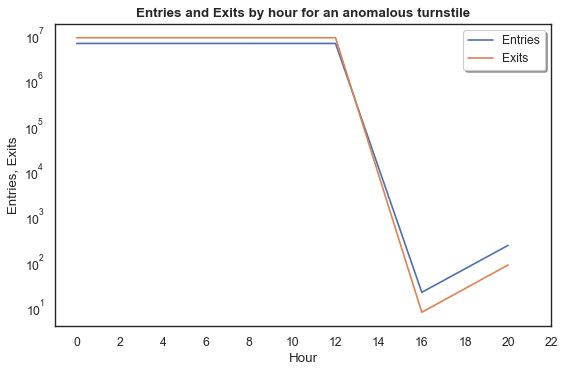

In [956]:
# Plot ENTRIES against HOUR to visualize the inconsistency in the masked anomalous turnstile
from matplotlib.pyplot import figure
figure(figsize=(8, 5), dpi=80)

x_1 = anomalous_turnstile_df['HOUR']
y_1 = anomalous_turnstile_df['ENTRIES']
y_2 = anomalous_turnstile_df['EXITS']

plt.plot(x_1,y_1)
plt.plot(x_1,y_2)
plt.yscale("symlog")
plt.title('Entries and Exits by hour for an anomalous turnstile',fontsize = 12,fontweight="bold",loc='center')
plt.xlabel('Hour')
plt.ylabel('Entries, Exits');
ticks_x = range(0,24,2)
plt.xticks(ticks_x)
plt.legend(['Entries','Exits'],shadow = True, loc = 0)
plt.savefig('/Users/valentinarizzati/Desktop/Images/anomalous_turnstile.png');

For this anomalous turnstile, representative of an entire cluster of turnstiles, ENTRIES and EXITS are not increasing by hour as they should because of their daily cumulative nature.<br />
Hence, the data must be investigated further to understand the nature of the anomaly and proceed with cleaning the dataset. 

In [842]:
# Filter data by turnstile for those instances where ENTRIES < PREV_ENTRIES
(turnstiles_daily_entries[turnstiles_daily_entries["ENTRIES"] < turnstiles_daily_entries["PREV_ENTRIES"]]
    .groupby(["CA", "UNIT", "SCP", "STATION"])
    .size())

CA    UNIT  SCP       STATION        
A002  R051  02-03-02  59 ST               1
A011  R080  01-03-00  57 ST-7 AV         83
            01-03-01  57 ST-7 AV          1
A025  R023  01-06-00  34 ST-HERALD SQ     1
A031  R083  00-00-01  23 ST               1
                                         ..
R619  R059  00-03-00  GRAND ARMY PLAZ     1
R622  R123  00-00-00  FRANKLIN AV        82
R624  R124  00-00-02  KINGSTON AV         1
R627  R063  00-03-02  SUTTER AV-RUTLD     1
R730  R431  00-00-04  EASTCHSTER/DYRE    83
Length: 193, dtype: int64

There are 193 turnstiles for which ENTRIES < PREV_ENTRIES, which is clearly not possible because ENTRIES are cumulative. This issue will be addressed below. 

#### 4.1.2 Deal with data anomalies and outliers

In [843]:
# Reset the counter for the cases in which ENTRIES < PREV_ENTRIES and treats outliers
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        # Maybe counter was reset, so it may make sense to take the minimum
        print(f'entries: {row["ENTRIES"]} <-- {row["PREV_ENTRIES"]}')
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
        
    if counter > max_counter:
        # If we still get a counter that is too big, set to zero
        return 0
    
    return counter

turnstiles_daily_entries["DAILY_ENTRIES"] = turnstiles_daily_entries.apply(get_daily_counts, axis=1, max_counter=1000000)

entries: 238 <-- 6641395.0
entries: 52806 <-- 17116894.0
entries: 117 <-- 11715665.0
entries: 198 <-- 5102094.0
entries: 327680 <-- 185586773.0
entries: 169 <-- 2172444.0
entries: 127 <-- 1657032.0
entries: 80 <-- 1640812.0
entries: 327834 <-- 2642486.0
entries: 16796392 <-- 123975.0
entries: 453044031 <-- 1779426.0
entries: 262272 <-- 2255518.0
entries: 57 <-- 2028804.0
entries: 16712028 <-- 6294957.0
entries: 177 <-- 16712669.0
entries: 394 <-- 2773389.0
entries: 106 <-- 67960951.0
entries: 147 <-- 11567738.0
entries: 1950 <-- 13809288.0
entries: 54 <-- 7903750.0
entries: 2293788 <-- 4259642.0
entries: 471 <-- 1377273.0
entries: 248 <-- 827160459.0
entries: 0 <-- 67108864.0
entries: 47 <-- 2514854.0
entries: 1376376 <-- 8181460.0
entries: 420 <-- 4343900.0
entries: 262297 <-- 1566066.0
entries: 35 <-- 10195434.0
entries: 702 <-- 3651815.0
entries: 697 <-- 13204039.0
entries: 191 <-- 2811568.0
entries: 647 <-- 239666917.0
entries: 262144 <-- 537268042.0
entries: 262185 <-- 67617764.0


In [844]:
turnstiles_daily_entries.head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,01/03/2021,7512214,01/02/2021,7511996.0,218.0
2,A002,R051,02-00-00,59 ST,01/04/2021,7512754,01/03/2021,7512214.0,540.0
3,A002,R051,02-00-00,59 ST,01/05/2021,7513300,01/04/2021,7512754.0,546.0
4,A002,R051,02-00-00,59 ST,01/06/2021,7513790,01/05/2021,7513300.0,490.0
5,A002,R051,02-00-00,59 ST,01/07/2021,7514328,01/06/2021,7513790.0,538.0


In [845]:
turnstiles_daily_entries.ENTRIES.describe()

count    4.140000e+05
mean     4.219504e+07
std      2.186592e+08
min      0.000000e+00
25%      2.205740e+05
50%      1.493708e+06
75%      6.165564e+06
max      2.128719e+09
Name: ENTRIES, dtype: float64

Mean and min are not negative anymore. Also the magnitude of observations is aligned across the quartiles. This is evidence of the fact that inconsistent data and outliers have been dealt correctly. 

In [846]:
# Create dataframe presenting daily entries by station by date
station_daily_entries = turnstiles_daily_entries.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily_entries.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,01/03/2021,2547.0
1,1 AV,01/04/2021,5303.0
2,1 AV,01/05/2021,5468.0
3,1 AV,01/06/2021,5603.0
4,1 AV,01/07/2021,5665.0


#### 4.1.3 Check for outliers

In [847]:
import seaborn as sns

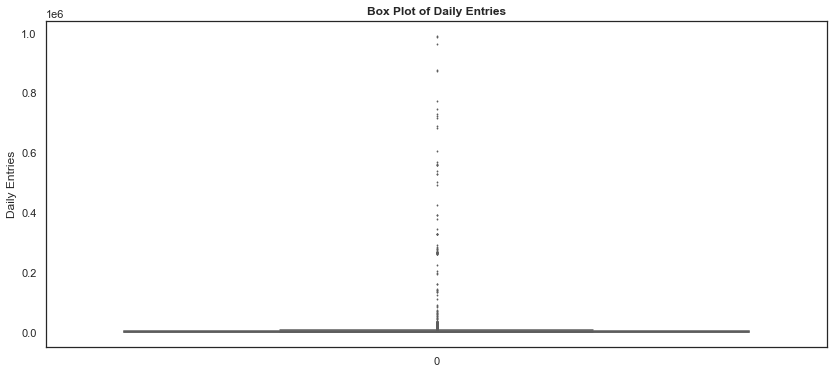

In [957]:
# Create boxplot for Daily Entries
sns.set(rc={"figure.figsize": (14, 6)})
sns.set_style("white")
boxplot_DAILY_ENTRIES = sns.boxplot(data=station_daily_entries["DAILY_ENTRIES"], palette = 'Greens',fliersize = 1)
boxplot_DAILY_ENTRIES.set_ylabel('Daily Entries')
boxplot_DAILY_ENTRIES.set_title("Box Plot of Daily Entries", fontsize = 12,fontweight="bold",loc='center')
boxplot_DAILY_ENTRIES.figure.savefig("/Users/valentinarizzati/Desktop/Images/box_plot_daily_entries.png");

The spread of the observations is so sizable that the boxplot is not visible.<br />
This is an indication that ourliers might be present in the data. However, for some very busy stations (e.g. TIMES SQUARE 42 ST) on a very busy day (e.g. Superbowl) number of entries of such great magnitude might make sense. For now, lacking metadata to suggest a different approach, I have decided not to treat the outliers. <br/>
**Next Step**: Gather data on a single station (or turnstile) for a longer period of time and examine trends. By slicing the data by station (or turnstile) it would be possible to better identify trends and, hence, outliers.

For representative purposes, the boxplot with no outliers is shown below.

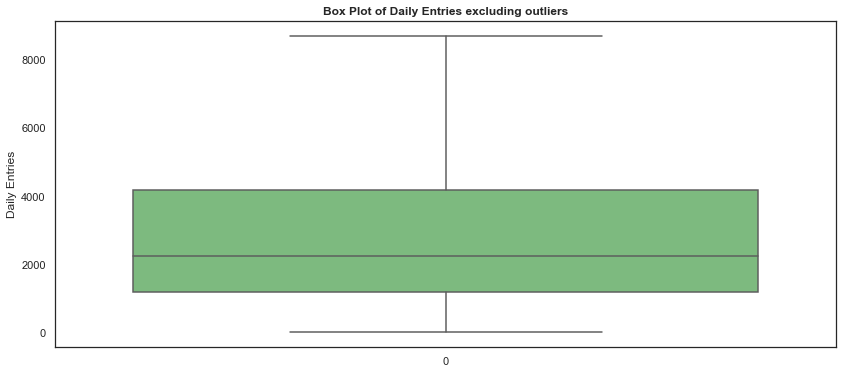

In [849]:
# Exclude outliers so we can see the boxplot
sns.set(rc={"figure.figsize": (14, 6)})
sns.set_style("white")
boxplot_DAILY_ENTRIES = sns.boxplot(data=station_daily_entries["DAILY_ENTRIES"], palette = 'Greens',showfliers = False)
boxplot_DAILY_ENTRIES.set_ylabel('Daily Entries')
boxplot_DAILY_ENTRIES.set_title("Box Plot of Daily Entries excluding outliers", fontsize = 12,fontweight="bold",loc='center');

In [850]:
station_daily_entries["DAILY_ENTRIES"].describe()

count     31363.000000
mean       4519.525045
std       22048.291262
min           0.000000
25%        1190.000000
50%        2236.000000
75%        4200.500000
max      991756.000000
Name: DAILY_ENTRIES, dtype: float64

As mentioned above, outliers will not be treated at this stage.

### 4.2 Compute Daily Exits by Station

#### 4.2.1 Define variable Daily Exits

In [851]:
turnstiles_daily_exits = (mta_df
                        .groupby(["CA", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .EXITS.first())

In [852]:
turnstiles_daily_exits.head()

,CA,UNIT,SCP,STATION,DATE,EXITS
0,A002,R051,02-00-00,59 ST,01/02/2021,2559007
1,A002,R051,02-00-00,59 ST,01/03/2021,2559091
2,A002,R051,02-00-00,59 ST,01/04/2021,2559328
3,A002,R051,02-00-00,59 ST,01/05/2021,2559580
4,A002,R051,02-00-00,59 ST,01/06/2021,2559817


In [853]:
# Create PREV_DATE and PREV_EXITS columns to facilitate the subtration between ENTRIES in subsequent DATE_TIME intervals
turnstiles_daily_exits[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_daily_exits
                                                       .groupby(["CA", "UNIT", "SCP", "STATION"])[["DATE", "EXITS"]]
                                                       .shift(1))

In [854]:
turnstiles_daily_exits.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [855]:
(turnstiles_daily_exits["EXITS"] - turnstiles_daily_exits["PREV_EXITS"]).describe()

count    4.140000e+05
mean    -7.186096e+03
std      4.536055e+06
min     -1.904428e+09
25%      4.700000e+01
50%      1.690000e+02
75%      3.940000e+02
max      1.086266e+09
dtype: float64

As for ENTRIES, the summary stats present negative mean and min. This suggests that there are records in the dataset for which EXITS < PREV_EXITS.

In [856]:
# Check for instances where EXITS < PREV_EXITS
turnstiles_daily_exits[turnstiles_daily_exits["EXITS"] < turnstiles_daily_exits["PREV_EXITS"]].shape

(2864, 8)

In [857]:
turnstiles_daily_exits[turnstiles_daily_exits["EXITS"] < turnstiles_daily_exits["PREV_EXITS"]].head()

,CA,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
415,A002,R051,02-03-02,59 ST,03/22/2021,88,03/21/2021,8869456.0
1799,A007,R079,01-05-01,5 AV/59 ST,02/08/2021,7,02/06/2021,26.0
3275,A011,R080,01-03-00,57 ST-7 AV,01/03/2021,489698567,01/02/2021,489698939.0
3276,A011,R080,01-03-00,57 ST-7 AV,01/04/2021,489697868,01/03/2021,489698567.0
3277,A011,R080,01-03-00,57 ST-7 AV,01/05/2021,489697074,01/04/2021,489697868.0


There are 2864 records for which EXITS is lower than PREV_EXITS, which is inconsistent with the definition of both columns

In [858]:
# Mask a specific instance where EXITS < PREV_EXITS
mask_daily_exits = ((mta_df["CA"] == "A002") & 
(mta_df["UNIT"] == "R051") & 
(mta_df["SCP"] == "02-03-02") & 
(mta_df["STATION"] == "59 ST") &
(mta_df["DATE_TIME"].dt.date == datetime.date(2021, 3, 22)))

In [859]:
mta_df[mask_daily_exits].sort_values('DATE_TIME')[['DATE', 'TIME', 'ENTRIES', 'EXITS']]

,DATE,TIME,ENTRIES,EXITS
2300104,03/22/2021,00:00:00,6641438,8869481
2300105,03/22/2021,04:00:00,6641440,8869486
2300106,03/22/2021,08:00:00,6641446,8869630
2300107,03/22/2021,12:00:00,6641481,8869858
2300108,03/22/2021,16:00:00,22,8
2300109,03/22/2021,20:00:00,238,88


In [860]:
(turnstiles_daily_exits[turnstiles_daily_exits["EXITS"] < turnstiles_daily_exits["PREV_EXITS"]]
    .groupby(["CA", "UNIT", "SCP", "STATION"])
    .size())

CA    UNIT  SCP       STATION        
A002  R051  02-03-02  59 ST               1
A007  R079  01-05-01  5 AV/59 ST          1
A011  R080  01-03-00  57 ST-7 AV         83
            01-03-01  57 ST-7 AV          1
A025  R023  01-06-00  34 ST-HERALD SQ     1
                                         ..
R604  R108  03-00-03  BOROUGH HALL        1
R619  R059  00-03-00  GRAND ARMY PLAZ     1
R622  R123  00-00-00  FRANKLIN AV        83
R624  R124  00-00-02  KINGSTON AV         1
R627  R063  00-03-02  SUTTER AV-RUTLD     1
Length: 187, dtype: int64

There are 187 turnstiles for which EXITS < PREV_EXITS. 

#### 4.2.2 Deal with data anomalies and outliers 

In [861]:
def get_daily_counts_exits(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        # Maybe counter was reset, so it may make sense to take the minimum
        print(f'exits: {row["EXITS"]} <-- {row["PREV_EXITS"]}')
        counter = min(row["EXITS"], row["PREV_EXITS"])
        
    if counter > max_counter:
        # If we still get a counter that is too big, set to zero
        return 0
    
    return counter

turnstiles_daily_exits["DAILY_EXITS"] = turnstiles_daily_exits.apply(get_daily_counts_exits, axis=1, max_counter=1000000)

exits: 88 <-- 8869456.0
exits: 45524 <-- 18816668.0
exits: 184 <-- 29823169.0
exits: 54 <-- 1719658.0
exits: 65540 <-- 17295986.0
exits: 74 <-- 1717529.0
exits: 5758166 <-- 1966977.0
exits: 11 <-- 5758421.0
exits: 268439877 <-- 1060617.0
exits: 116 <-- 1481691.0
exits: 39 <-- 2375240.0
exits: 279 <-- 1411544.0
exits: 135 <-- 134694104.0
exits: 51 <-- 6430045.0
exits: 1429 <-- 15269731.0
exits: 58 <-- 6427794.0
exits: 18 <-- 6647582.0
exits: 766 <-- 1731707.0
exits: 269 <-- 1904427942.0
exits: 2 <-- 16777325.0
exits: 182 <-- 5758082.0
exits: 262319 <-- 6220102.0
exits: 286 <-- 1787198.0
exits: 158 <-- 11465591.0
exits: 968 <-- 3630202.0
exits: 1983 <-- 25341043.0
exits: 426 <-- 3505140.0
exits: 359 <-- 1406320670.0
exits: 1 <-- 134237104.0
exits: 654311428 <-- 0.0
exits: 160 <-- 13133461.0
exits: 148 <-- 14489053.0
exits: 86 <-- 1667925.0
exits: 317 <-- 10107753.0
exits: 130860 <-- 2548942.0
exits: 778 <-- 4207998.0
exits: 241 <-- 10121717.0
exits: 41 <-- 1365136.0
exits: 153 <-- 294753

In [862]:
turnstiles_daily_exits.head()

,CA,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,01/03/2021,2559091,01/02/2021,2559007.0,84.0
2,A002,R051,02-00-00,59 ST,01/04/2021,2559328,01/03/2021,2559091.0,237.0
3,A002,R051,02-00-00,59 ST,01/05/2021,2559580,01/04/2021,2559328.0,252.0
4,A002,R051,02-00-00,59 ST,01/06/2021,2559817,01/05/2021,2559580.0,237.0
5,A002,R051,02-00-00,59 ST,01/07/2021,2560068,01/06/2021,2559817.0,251.0


In [863]:
turnstiles_daily_exits.EXITS.describe()

count    4.140000e+05
mean     3.392004e+07
std      1.943668e+08
min      0.000000e+00
25%      9.273375e+04
50%      8.974130e+05
75%      4.049702e+06
max      2.123066e+09
Name: EXITS, dtype: float64

The summary stats above provide evidence of the fact that inconsistencies and outliers have been dealt with correclty.

In [864]:
# Create dataframe presenting daily exits by station by date
station_daily_exits = turnstiles_daily_exits.groupby(["STATION", "DATE"])[['DAILY_EXITS']].sum().reset_index()
station_daily_exits.head()

,STATION,DATE,DAILY_EXITS
0,1 AV,01/03/2021,4537.0
1,1 AV,01/04/2021,8145.0
2,1 AV,01/05/2021,8332.0
3,1 AV,01/06/2021,8532.0
4,1 AV,01/07/2021,8568.0


#### 4.2.3 Check for outliers

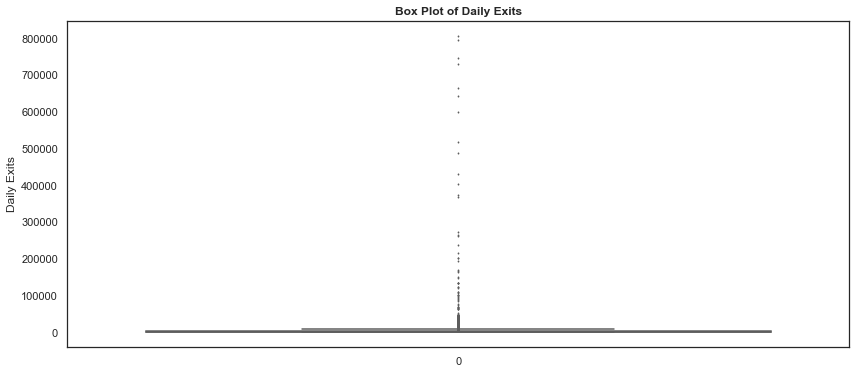

In [865]:
# Create boxplot for Daily Exits
sns.set(rc={"figure.figsize": (14, 6)})
sns.set_style("white")
boxplot_DAILY_EXITS = sns.boxplot(data=station_daily_exits["DAILY_EXITS"], palette = 'Greens',fliersize = 1)
boxplot_DAILY_EXITS.set_ylabel('Daily Exits')
boxplot_DAILY_EXITS.set_title("Box Plot of Daily Exits", fontsize = 12,fontweight="bold",loc='center');

The spread of the observations is so sizable that the boxplot is not visible.<br />
This is an indication that ourliers might be present in the data. However, for some very busy stations (e.g. TIMES SQUARE 42 ST) on a very busy day (e.g. Superbowl) number of exits of such great magnitude might make sense. For now, lacking metadata to suggest a different approach, I have decided not to treat the outliers. <br/>
**Next Step**: Gather data on a single station (or turnstile) for a longer period of time and examine trends. By slicing the data by station (or turnstile) it would be possible to better identify trends and, hence, outliers.

For representative purposes, the boxplot with no outliers is shown below.

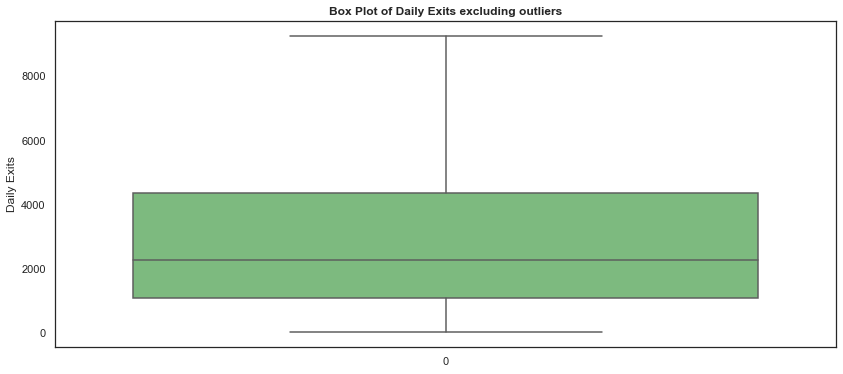

In [866]:
# Exclude outliers so we can see the boxplot
sns.set(rc={"figure.figsize": (14, 6)})
sns.set_style("white")
boxplot_DAILY_EXITS = sns.boxplot(data=station_daily_exits["DAILY_EXITS"], palette = 'Greens',showfliers=False)
boxplot_DAILY_EXITS.set_ylabel('Daily Exits')
boxplot_DAILY_EXITS.set_title("Box Plot of Daily Exits excluding outliers", fontsize = 12,fontweight="bold",loc='center');

In [867]:
station_daily_exits["DAILY_EXITS"].describe()

count     31363.000000
mean       4257.530721
std       14156.188260
min           0.000000
25%        1067.500000
50%        2277.000000
75%        4347.500000
max      806655.000000
Name: DAILY_EXITS, dtype: float64

As mentioned above, outliers will not be treated at this stage.

### 4.3 Data Modeling

#### 4.3.1 Merge the DAILY ENTRIES and DAILY EXITS dataframes

In [868]:
# Merge DAILY_ENTRIES and DAILY_EXITS columns from the respective dataframes
station_daily_merged = pd.merge(station_daily_entries, station_daily_exits,  how='left', left_on=['STATION','DATE'], right_on = ['STATION','DATE'])

In [869]:
station_daily_merged

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
0,1 AV,01/03/2021,2547.0,4537.0
1,1 AV,01/04/2021,5303.0,8145.0
2,1 AV,01/05/2021,5468.0,8332.0
3,1 AV,01/06/2021,5603.0,8532.0
4,1 AV,01/07/2021,5665.0,8568.0
...,...,...,...,...
31358,ZEREGA AV,03/22/2021,1019.0,1235.0
31359,ZEREGA AV,03/23/2021,961.0,1241.0
31360,ZEREGA AV,03/24/2021,913.0,1213.0
31361,ZEREGA AV,03/25/2021,932.0,1176.0


In [870]:
# Sanity Check - Daily Entries dataframe
mask_daily_entries_check = ((station_daily_entries["STATION"] == "1 AV") & 
(station_daily_entries["DATE"] == "01/05/2021"))

station_daily_entries[mask_daily_entries_check].head()

,STATION,DATE,DAILY_ENTRIES
2,1 AV,01/05/2021,5468.0


In [871]:
# Sanity Check - Daily Exits dataframe
mask_daily_exits_check = ((station_daily_exits["STATION"] == "1 AV") & 
(station_daily_exits["DATE"] == "01/05/2021"))

station_daily_exits[mask_daily_exits_check].head()

,STATION,DATE,DAILY_EXITS
2,1 AV,01/05/2021,8332.0


In [872]:
# Sanity Check - Merged dataframe
mask_daily_merged_check = ((station_daily_merged["STATION"] == "1 AV") & 
(station_daily_merged["DATE"] == "01/05/2021"))

station_daily_merged[mask_daily_merged_check].head()

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
2,1 AV,01/05/2021,5468.0,8332.0


Since the DAILY_ENTRIES and DAILY_EXITS of the individual station_daily_entries and station_daily_exits dataframes match with respectively the DAILY_ENTRIES and DAILY_EXITS in the merged dataframe, we have passed the sanity check and we can assume the data to be merged properly.

#### 4.3.2 Define Traffic Variable

The data will be segmented in three steps as shown in the visual below.

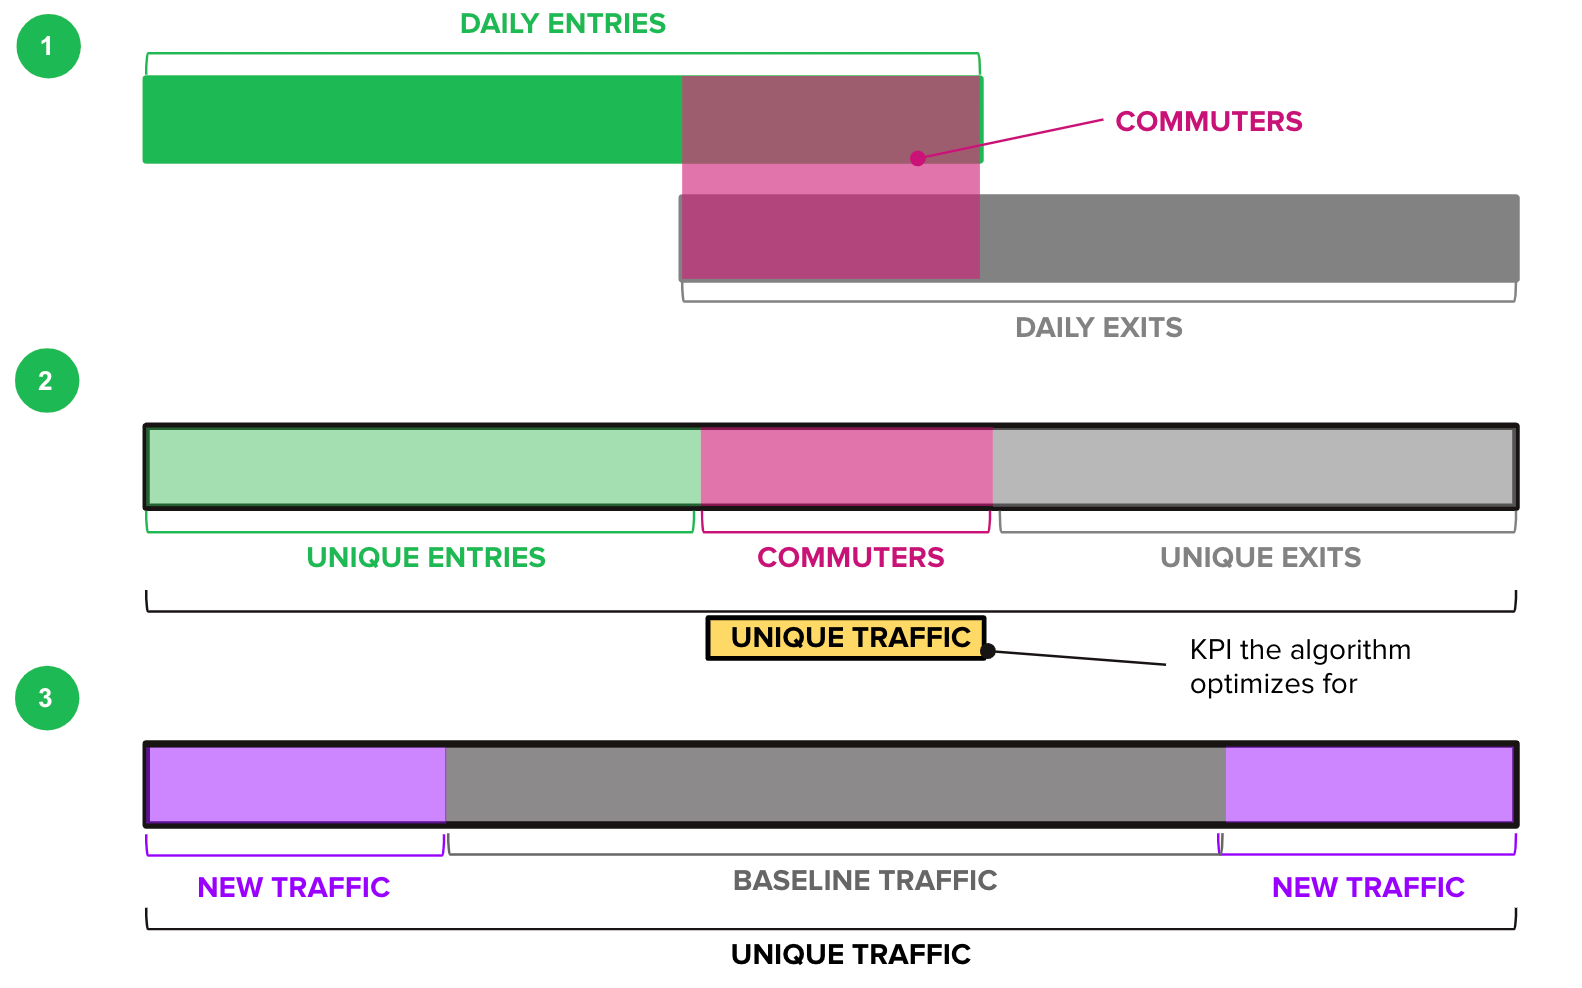

In this section, new columns will be added to the new merged dataframe:</b>
- **TOTAL_TRAFFIC** = DAILY_ENTRIES + DAILY_EXITS // This is the total amount of traffic passing through a station every day, regardless of the amount of unique *individuals* passing through that station</b>
- **TRAFFIC_LEVEL** = **HIGH** if the observation of TOTAL_TRAFFIC for a specific STATION is in the third tertile of the TOTAL_TRAFFIC distribution; **MEDIUM** if the observation of TOTAL_TRAFFIC for a specific STATION is in the second tertile of the TOTAL_TRAFFIC distribution; **LOW** if the observation of TOTAL_TRAFFIC for a specific STATION is in the first tertile of the TOTAL_TRAFFIC distribution

In [873]:
# Create new column TOTAL_TRAFFIC
station_daily_merged['TOTAL_TRAFFIC'] = station_daily_merged['DAILY_ENTRIES']+station_daily_merged['DAILY_EXITS']
station_daily_merged.head()

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL_TRAFFIC
0,1 AV,01/03/2021,2547.0,4537.0,7084.0
1,1 AV,01/04/2021,5303.0,8145.0,13448.0
2,1 AV,01/05/2021,5468.0,8332.0,13800.0
3,1 AV,01/06/2021,5603.0,8532.0,14135.0
4,1 AV,01/07/2021,5665.0,8568.0,14233.0


In [874]:
# Sanity Check - Daily Entries dataframe
mask_daily_entries_check_1 = ((station_daily_entries["STATION"] == "1 AV") & 
(station_daily_entries["DATE"] == "01/03/2021"))

station_daily_entries[mask_daily_entries_check_1].head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,01/03/2021,2547.0


In [875]:
# Sanity Check - Daily Exits dataframe
mask_daily_exits_check_1 = ((station_daily_exits["STATION"] == "1 AV") & 
(station_daily_exits["DATE"] == "01/03/2021"))

station_daily_exits[mask_daily_exits_check_1].head()

,STATION,DATE,DAILY_EXITS
0,1 AV,01/03/2021,4537.0


The sum of DAILY_ENTRIES and DAILY_EXITS is correctly calculated as TOTAL_TRAFFIC.

In [876]:
# Define TRAFFIC_LEVEL as a categorical variable taking different values depending on TOTAL_TRAFFIC
station_daily_merged["TRAFFIC_LEVEL"] = pd.qcut(station_daily_merged['TOTAL_TRAFFIC'], 3, ['LOW','MEDIUM','HIGH'])

In [877]:
station_daily_merged.head()

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL_TRAFFIC,TRAFFIC_LEVEL
0,1 AV,01/03/2021,2547.0,4537.0,7084.0,HIGH
1,1 AV,01/04/2021,5303.0,8145.0,13448.0,HIGH
2,1 AV,01/05/2021,5468.0,8332.0,13800.0,HIGH
3,1 AV,01/06/2021,5603.0,8532.0,14135.0,HIGH
4,1 AV,01/07/2021,5665.0,8568.0,14233.0,HIGH


In [878]:
# First sanity check looking at the attribution of observations per bucket of TRAFFIC_LEVEL
station_daily_merged["TRAFFIC_LEVEL"].value_counts()

MEDIUM    10458
LOW       10455
HIGH      10450
Name: TRAFFIC_LEVEL, dtype: int64

The fact that there are nearly the same amount of observations in every bucket of TRAFFIC_LEVEL is a confirmation that the split of TOTAL_TRAFFIC in tertiles has been correctly executed. Let's now sanity check for a quantile with "MEDIUM" TRAFFIC_LEVEL.

In [879]:
# Second sanity check looking at a subset of observations presenting a "MEDIUM" value for TRAFFIC_LEVEL
mask_daily_merged_check_3 = ((station_daily_merged["TRAFFIC_LEVEL"] == "MEDIUM"))

station_daily_merged[mask_daily_merged_check_3].head()

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL_TRAFFIC,TRAFFIC_LEVEL
195,103 ST-CORONA,02/01/2021,3625.0,2824.0,6449.0,MEDIUM
271,104 ST,01/25/2021,1751.0,1461.0,3212.0,MEDIUM
272,104 ST,01/26/2021,1759.0,1493.0,3252.0,MEDIUM
273,104 ST,01/27/2021,1787.0,1577.0,3364.0,MEDIUM
274,104 ST,01/28/2021,1868.0,1492.0,3360.0,MEDIUM


In [880]:
import numpy as np

In [881]:
first_tertile_traffic = np.percentile(station_daily_merged.TOTAL_TRAFFIC, 33)
first_tertile_traffic

2967.460000000001

In [882]:
second_tertile_traffic = np.percentile(station_daily_merged.TOTAL_TRAFFIC, 66)
second_tertile_traffic

6509.0

The comparison of the mask above with the values of the first and second tertiles indicates that the attribution of the observations in the mask to "MEDIUM" TRAFFIC_LEVEL is correct. The sanity check is therefore passed.

#### 4.3.3 Segment Traffic variable into more relevant categories

For our specific advertising purposes, it is more relevant to look at unique individuals passing through a station every day, instead of the total traffic characterizing a station. This is due to the fact that, for this specific campaign, we intend to be more efficient with our marketing dollars, thus avoiding spending marketing dollars on the same individual.

Therefore, we need to segment our TOTAL_TRAFFIC variable further into: </b>
- **COMMUTERS** = x% * DAILY_ENTRIES // unique individuals that enter and exit the same station once a day (same individuals accounts for one entry and one exits at the same station)</b>
- **UNIQUE_TRAFFIC** = DAILY_ENTRIES + DAILY_EXITS - COMMUTERS // unique individuals that go through a station every day</b>
- **UNIQUE_BASELINE_TRAFFIC** = y% * UNIQUE_TRAFFIC // unique individuals that pass through that station (either as *COMMUTERS* or as unique entries or exits every day</b>
- **UNIQUE_NEW_TRAFFIC** = UNIQUE_TRAFFIC - UNIQUE_BASELINE_TRAFFIC // unique individuals that are newly entering or exiting a specific station

In [883]:
# Define the x% for the computation of COMMUTERS
commuter_dict = {
    'HIGH': 0.6,
    'MEDIUM': 0.5,
    'LOW': 0.4,
}

The value of x% decreases from HIGH to LOW because the hypothesis is that a station characterized by high TOTAL_TRAFFIC (i.e. a major station within the city) will also be characterized by a high level of commuters. <br />
Conversely, a minor station is characterized by a lower level of commuters.

In [884]:
# Map the dictionary to the column TRAFFIC_LEVEL
station_daily_merged.TRAFFIC_LEVEL.map(commuter_dict)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


0        0.6
1        0.6
2        0.6
3        0.6
4        0.6
        ... 
31358    0.4
31359    0.4
31360    0.4
31361    0.4
31362    0.4
Name: TRAFFIC_LEVEL, Length: 31363, dtype: category
Categories (3, float64): [0.4 < 0.5 < 0.6]

In [885]:
# Create a new column COMMUTER_PERC associating the TRAFFIC_LEVEL with the respective value in the commuter_dict
station_daily_merged['COMMUTER_PERC'] = station_daily_merged.TRAFFIC_LEVEL.map(commuter_dict)

In [886]:
station_daily_merged.head()

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL_TRAFFIC,TRAFFIC_LEVEL,COMMUTER_PERC
0,1 AV,01/03/2021,2547.0,4537.0,7084.0,HIGH,0.6
1,1 AV,01/04/2021,5303.0,8145.0,13448.0,HIGH,0.6
2,1 AV,01/05/2021,5468.0,8332.0,13800.0,HIGH,0.6
3,1 AV,01/06/2021,5603.0,8532.0,14135.0,HIGH,0.6
4,1 AV,01/07/2021,5665.0,8568.0,14233.0,HIGH,0.6


In [887]:
station_daily_merged.COMMUTER_PERC.value_counts()

0.5    10458
0.4    10455
0.6    10450
Name: COMMUTER_PERC, dtype: int64

The sanity check is passed since 'HIGH' in TRAFFIC_LEVEL is equivalent to 60% in COMMUTER_PERC. Also, as shown throught the value_counts method, the three values of COMMUTER_PERC are correctly distributed across observations.

In [888]:
# Change data type of COMMUTER_PERC to float so we can use it in modeling
station_daily_merged['COMMUTER_PERC'] = station_daily_merged['COMMUTER_PERC'].astype(float)

In [889]:
station_daily_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31363 entries, 0 to 31362
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   STATION        31363 non-null  object  
 1   DATE           31363 non-null  object  
 2   DAILY_ENTRIES  31363 non-null  float64 
 3   DAILY_EXITS    31363 non-null  float64 
 4   TOTAL_TRAFFIC  31363 non-null  float64 
 5   TRAFFIC_LEVEL  31363 non-null  category
 6   COMMUTER_PERC  31363 non-null  float64 
dtypes: category(1), float64(4), object(2)
memory usage: 1.7+ MB


In [890]:
# Create column COMMUTERS
station_daily_merged['COMMUTERS'] = station_daily_merged['TOTAL_TRAFFIC'] * station_daily_merged['COMMUTER_PERC']

In [891]:
station_daily_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31363 entries, 0 to 31362
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   STATION        31363 non-null  object  
 1   DATE           31363 non-null  object  
 2   DAILY_ENTRIES  31363 non-null  float64 
 3   DAILY_EXITS    31363 non-null  float64 
 4   TOTAL_TRAFFIC  31363 non-null  float64 
 5   TRAFFIC_LEVEL  31363 non-null  category
 6   COMMUTER_PERC  31363 non-null  float64 
 7   COMMUTERS      31363 non-null  float64 
dtypes: category(1), float64(5), object(2)
memory usage: 1.9+ MB


In [892]:
station_daily_merged.head()

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL_TRAFFIC,TRAFFIC_LEVEL,COMMUTER_PERC,COMMUTERS
0,1 AV,01/03/2021,2547.0,4537.0,7084.0,HIGH,0.6,4250.4
1,1 AV,01/04/2021,5303.0,8145.0,13448.0,HIGH,0.6,8068.8
2,1 AV,01/05/2021,5468.0,8332.0,13800.0,HIGH,0.6,8280.0
3,1 AV,01/06/2021,5603.0,8532.0,14135.0,HIGH,0.6,8481.0
4,1 AV,01/07/2021,5665.0,8568.0,14233.0,HIGH,0.6,8539.8


In [893]:
# Create column UNIQUE_TRAFFIC
station_daily_merged['UNIQUE_TRAFFIC'] = station_daily_merged['DAILY_ENTRIES'] + station_daily_merged['DAILY_EXITS'] - station_daily_merged['COMMUTERS']

In [894]:
station_daily_merged.head()

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL_TRAFFIC,TRAFFIC_LEVEL,COMMUTER_PERC,COMMUTERS,UNIQUE_TRAFFIC
0,1 AV,01/03/2021,2547.0,4537.0,7084.0,HIGH,0.6,4250.4,2833.6
1,1 AV,01/04/2021,5303.0,8145.0,13448.0,HIGH,0.6,8068.8,5379.2
2,1 AV,01/05/2021,5468.0,8332.0,13800.0,HIGH,0.6,8280.0,5520.0
3,1 AV,01/06/2021,5603.0,8532.0,14135.0,HIGH,0.6,8481.0,5654.0
4,1 AV,01/07/2021,5665.0,8568.0,14233.0,HIGH,0.6,8539.8,5693.2


In [895]:
# Define the Y% for the computation of BASELINE_TRAFFIC
baseline_dict = {
    'HIGH': 0.5,
    'MEDIUM': 0.7,
    'LOW': 0.9,
}

The value of y% increases from HIGH to LOW because the hypothesis is that a station characterized by high TOTAL_TRAFFIC (i.e. a major station within the city) will also be characterized by a high level of variable and new traffic (e.g. tourists). <br />
Conversely, a minor station is characterized by a higher level of regular traffic (i.e. baseline traffic).

In [896]:
station_daily_merged.TRAFFIC_LEVEL.map(baseline_dict)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


0        0.5
1        0.5
2        0.5
3        0.5
4        0.5
        ... 
31358    0.9
31359    0.9
31360    0.9
31361    0.9
31362    0.9
Name: TRAFFIC_LEVEL, Length: 31363, dtype: category
Categories (3, float64): [0.9 < 0.7 < 0.5]

In [897]:
# Create column BASELINE_PERC
station_daily_merged['BASELINE_PERC'] = station_daily_merged.TRAFFIC_LEVEL.map(baseline_dict)

In [898]:
station_daily_merged.head()

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL_TRAFFIC,TRAFFIC_LEVEL,COMMUTER_PERC,COMMUTERS,UNIQUE_TRAFFIC,BASELINE_PERC
0,1 AV,01/03/2021,2547.0,4537.0,7084.0,HIGH,0.6,4250.4,2833.6,0.5
1,1 AV,01/04/2021,5303.0,8145.0,13448.0,HIGH,0.6,8068.8,5379.2,0.5
2,1 AV,01/05/2021,5468.0,8332.0,13800.0,HIGH,0.6,8280.0,5520.0,0.5
3,1 AV,01/06/2021,5603.0,8532.0,14135.0,HIGH,0.6,8481.0,5654.0,0.5
4,1 AV,01/07/2021,5665.0,8568.0,14233.0,HIGH,0.6,8539.8,5693.2,0.5


In [206]:
station_daily_merged.BASELINE_PERC.value_counts()

0.7    10458
0.9    10455
0.5    10450
Name: BASELINE_PERC, dtype: int64

In [899]:
# Change BASELINE_PERC data type to float so we can use it in compitations
station_daily_merged['BASELINE_PERC'] = station_daily_merged['BASELINE_PERC'].astype(float)

In [900]:
# Create column UNIQUE_BASELINE_TRAFFIC
station_daily_merged["UNIQUE_BASELINE_TRAFFIC"] = station_daily_merged['BASELINE_PERC'] * station_daily_merged['UNIQUE_TRAFFIC']

In [901]:
station_daily_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31363 entries, 0 to 31362
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   STATION                  31363 non-null  object  
 1   DATE                     31363 non-null  object  
 2   DAILY_ENTRIES            31363 non-null  float64 
 3   DAILY_EXITS              31363 non-null  float64 
 4   TOTAL_TRAFFIC            31363 non-null  float64 
 5   TRAFFIC_LEVEL            31363 non-null  category
 6   COMMUTER_PERC            31363 non-null  float64 
 7   COMMUTERS                31363 non-null  float64 
 8   UNIQUE_TRAFFIC           31363 non-null  float64 
 9   BASELINE_PERC            31363 non-null  float64 
 10  UNIQUE_BASELINE_TRAFFIC  31363 non-null  float64 
dtypes: category(1), float64(8), object(2)
memory usage: 2.7+ MB


In [902]:
# Create column UNIQUE_NEW_TRAFFIC
station_daily_merged["UNIQUE_NEW_TRAFFIC"] = station_daily_merged['UNIQUE_TRAFFIC'] - station_daily_merged['UNIQUE_BASELINE_TRAFFIC']

In [903]:
station_daily_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31363 entries, 0 to 31362
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   STATION                  31363 non-null  object  
 1   DATE                     31363 non-null  object  
 2   DAILY_ENTRIES            31363 non-null  float64 
 3   DAILY_EXITS              31363 non-null  float64 
 4   TOTAL_TRAFFIC            31363 non-null  float64 
 5   TRAFFIC_LEVEL            31363 non-null  category
 6   COMMUTER_PERC            31363 non-null  float64 
 7   COMMUTERS                31363 non-null  float64 
 8   UNIQUE_TRAFFIC           31363 non-null  float64 
 9   BASELINE_PERC            31363 non-null  float64 
 10  UNIQUE_BASELINE_TRAFFIC  31363 non-null  float64 
 11  UNIQUE_NEW_TRAFFIC       31363 non-null  float64 
dtypes: category(1), float64(9), object(2)
memory usage: 2.9+ MB


In [904]:
station_daily_merged.head()

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL_TRAFFIC,TRAFFIC_LEVEL,COMMUTER_PERC,COMMUTERS,UNIQUE_TRAFFIC,BASELINE_PERC,UNIQUE_BASELINE_TRAFFIC,UNIQUE_NEW_TRAFFIC
0,1 AV,01/03/2021,2547.0,4537.0,7084.0,HIGH,0.6,4250.4,2833.6,0.5,1416.8,1416.8
1,1 AV,01/04/2021,5303.0,8145.0,13448.0,HIGH,0.6,8068.8,5379.2,0.5,2689.6,2689.6
2,1 AV,01/05/2021,5468.0,8332.0,13800.0,HIGH,0.6,8280.0,5520.0,0.5,2760.0,2760.0
3,1 AV,01/06/2021,5603.0,8532.0,14135.0,HIGH,0.6,8481.0,5654.0,0.5,2827.0,2827.0
4,1 AV,01/07/2021,5665.0,8568.0,14233.0,HIGH,0.6,8539.8,5693.2,0.5,2846.6,2846.6


#### 4.3.4 Establish final ranking

As a final step,the stations will be ranked by TOTAL_UNIQUE_TRAFFIC for the entire period of analysis. 

In [905]:
# Sanity check to ensure that every station has the same number of days associated to it (same period of analysis) 
station_daily_merged.groupby(['STATION']).count()

,DATE,DAILY_ENTRIES,DAILY_EXITS,TOTAL_TRAFFIC,TRAFFIC_LEVEL,COMMUTER_PERC,COMMUTERS,UNIQUE_TRAFFIC,BASELINE_PERC,UNIQUE_BASELINE_TRAFFIC,UNIQUE_NEW_TRAFFIC
STATION,,,,,,,,,,,
1 AV,83,83,83,83,83,83,83,83,83,83,83
103 ST,83,83,83,83,83,83,83,83,83,83,83
103 ST-CORONA,83,83,83,83,83,83,83,83,83,83,83
104 ST,83,83,83,83,83,83,83,83,83,83,83
110 ST,83,83,83,83,83,83,83,83,83,83,83
...,...,...,...,...,...,...,...,...,...,...,...
WOODLAWN,83,83,83,83,83,83,83,83,83,83,83
WORLD TRADE CTR,83,83,83,83,83,83,83,83,83,83,83
WTC-CORTLANDT,83,83,83,83,83,83,83,83,83,83,83


Sanity check is passed. The period of analysis is 83 days by station.

In [906]:
station_all_time = station_daily_merged.groupby('STATION')['UNIQUE_TRAFFIC'].sum() \
    .reset_index() \
    .sort_values('UNIQUE_TRAFFIC', ascending=False)

station_all_time.head()

,STATION,UNIQUE_TRAFFIC
61,34 ST-PENN STA,2340203.2
59,34 ST-HERALD SQ,2043914.0
233,GRD CNTRL-42 ST,1847698.8
352,TIMES SQ-42 ST,1759209.2
9,125 ST,1691250.4


In [907]:
station_all_time.shape

(378, 2)

## 5. Map the results

To increase the degree of precision of the geocode algorithm, the string "MTA NY" has been added to the records in the column 'STATION'.

In [908]:
# Create a STATION_ADJ column to add additional information for the geocoding to run with a greater degree of precision 
station_all_time['STATION_ADJ'] = station_all_time["STATION"] + " " + "MTA NYC"

In [909]:
station_all_time.head()

,STATION,UNIQUE_TRAFFIC,STATION_ADJ
61,34 ST-PENN STA,2340203.2,34 ST-PENN STA MTA NYC
59,34 ST-HERALD SQ,2043914.0,34 ST-HERALD SQ MTA NYC
233,GRD CNTRL-42 ST,1847698.8,GRD CNTRL-42 ST MTA NYC
352,TIMES SQ-42 ST,1759209.2,TIMES SQ-42 ST MTA NYC
9,125 ST,1691250.4,125 ST MTA NYC


In [910]:
# Rearrange the table
station_all_time = station_all_time[['STATION', 'STATION_ADJ', 'UNIQUE_TRAFFIC']]

In [911]:
station_all_time.head()

,STATION,STATION_ADJ,UNIQUE_TRAFFIC
61,34 ST-PENN STA,34 ST-PENN STA MTA NYC,2340203.2
59,34 ST-HERALD SQ,34 ST-HERALD SQ MTA NYC,2043914.0
233,GRD CNTRL-42 ST,GRD CNTRL-42 ST MTA NYC,1847698.8
352,TIMES SQ-42 ST,TIMES SQ-42 ST MTA NYC,1759209.2
9,125 ST,125 ST MTA NYC,1691250.4


In [958]:
station_all_time.shape

(378, 9)

### 5.1 Import Latitude and Longitude for all stations

In [912]:
# Import client for geocoding
import geopy
from geopy.geocoders import GoogleV3

In [913]:
# Set path to open text file containing Google API key
with open('/Users/valentinarizzati/Desktop/apikey.txt') as f:
    my_key = f.readline()
    f.close

In [914]:
# Set the geolocator and connect to my API key
geolocator = GoogleV3(api_key=my_key)

In [915]:
# Resolve a location from the string displayed in the column STATION_ADJ
station_all_time["LOC"] = station_all_time["STATION_ADJ"].apply(geolocator.geocode)

In [916]:
station_all_time.head()

,STATION,STATION_ADJ,UNIQUE_TRAFFIC,LOC
61,34 ST-PENN STA,34 ST-PENN STA MTA NYC,2340203.2,"(34 Street Penn Station, New York, NY 10001, U..."
59,34 ST-HERALD SQ,34 ST-HERALD SQ MTA NYC,2043914.0,"(34 St - Herald Sq Subway Station, New York, N..."
233,GRD CNTRL-42 ST,GRD CNTRL-42 ST MTA NYC,1847698.8,"(Grand Central - 42 St, New York, NY 10017, US..."
352,TIMES SQ-42 ST,TIMES SQ-42 ST MTA NYC,1759209.2,"(Times Sq - 42 St, New York, NY 10018, USA, (4..."
9,125 ST,125 ST MTA NYC,1691250.4,"(125 St, East 125th St &, Lexington Ave, New Y..."


In [917]:
# Resolve the point (latitude, longitude, altitude) from the location and format appropriately
station_all_time["POINT"] = station_all_time["LOC"].apply(lambda LOC: tuple(LOC.point) if LOC else None)

In [918]:
station_all_time.head()

,STATION,STATION_ADJ,UNIQUE_TRAFFIC,LOC,POINT
61,34 ST-PENN STA,34 ST-PENN STA MTA NYC,2340203.2,"(34 Street Penn Station, New York, NY 10001, U...","(40.751056, -73.9903102, 0.0)"
59,34 ST-HERALD SQ,34 ST-HERALD SQ MTA NYC,2043914.0,"(34 St - Herald Sq Subway Station, New York, N...","(40.7500869, -73.98812699999999, 0.0)"
233,GRD CNTRL-42 ST,GRD CNTRL-42 ST MTA NYC,1847698.8,"(Grand Central - 42 St, New York, NY 10017, US...","(40.7524688, -73.9774869, 0.0)"
352,TIMES SQ-42 ST,TIMES SQ-42 ST MTA NYC,1759209.2,"(Times Sq - 42 St, New York, NY 10018, USA, (4...","(40.7558611, -73.987061, 0.0)"
9,125 ST,125 ST MTA NYC,1691250.4,"(125 St, East 125th St &, Lexington Ave, New Y...","(40.8043863, -73.9374292, 0.0)"


In [919]:
# Extract latitude, longitude and altitude from the point
station_all_time[['LAT', 'LON', 'ALTITUDE']] = pd.DataFrame(station_all_time['POINT'].to_list(), index=station_all_time.index)

In [920]:
station_all_time.head()

,STATION,STATION_ADJ,UNIQUE_TRAFFIC,LOC,POINT,LAT,LON,ALTITUDE
61,34 ST-PENN STA,34 ST-PENN STA MTA NYC,2340203.2,"(34 Street Penn Station, New York, NY 10001, U...","(40.751056, -73.9903102, 0.0)",40.751056,-73.990310,0.0
59,34 ST-HERALD SQ,34 ST-HERALD SQ MTA NYC,2043914.0,"(34 St - Herald Sq Subway Station, New York, N...","(40.7500869, -73.98812699999999, 0.0)",40.750087,-73.988127,0.0
233,GRD CNTRL-42 ST,GRD CNTRL-42 ST MTA NYC,1847698.8,"(Grand Central - 42 St, New York, NY 10017, US...","(40.7524688, -73.9774869, 0.0)",40.752469,-73.977487,0.0
352,TIMES SQ-42 ST,TIMES SQ-42 ST MTA NYC,1759209.2,"(Times Sq - 42 St, New York, NY 10018, USA, (4...","(40.7558611, -73.987061, 0.0)",40.755861,-73.987061,0.0
9,125 ST,125 ST MTA NYC,1691250.4,"(125 St, East 125th St &, Lexington Ave, New Y...","(40.8043863, -73.9374292, 0.0)",40.804386,-73.937429,0.0


#### 5.1.1 Check for duplicates

In [921]:
# Create a mask to check for duplicates
duplicate_station = station_all_time[station_all_time.duplicated(['STATION'])]

In [922]:
duplicate_station

,STATION,STATION_ADJ,UNIQUE_TRAFFIC,LOC,POINT,LAT,LON,ALTITUDE


There is no duplicate station in the dataset.

#### 5.1.2 Check for missing values

In [923]:
# Check for missing values
station_all_time.isna().sum()

STATION           0
STATION_ADJ       0
UNIQUE_TRAFFIC    0
LOC               0
POINT             0
LAT               0
LON               0
ALTITUDE          0
dtype: int64

In [924]:
is_NaN = station_all_time.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = station_all_time[row_has_NaN]

In [925]:
rows_with_NaN

,STATION,STATION_ADJ,UNIQUE_TRAFFIC,LOC,POINT,LAT,LON,ALTITUDE


There is no row with missing values in the dataset.

#### 5.1.3 Check if all the values for LAT and LON are in NYC

As mentioned on [this](https://www.latlong.net/place/new-york-usa-27719.html) source for latitude and longitude data NYC addresses follow in the following coordinate ranges: <br />
- latitude values between 40 and 41
- longitude values between -73 and -74

Therefore, to identify potential stations that have been wrongly geocoded, it suffices to filter the dataframe for those stations having a value of latitude that is not between 40 and 41. Because of the level of precision of coordinates, treating the latitude should be enough to highlight potential inconsistencies in the data.

In [926]:
inconsistent_geos = station_all_time[(station_all_time['LAT'] < 40) | (station_all_time['LAT'] > 41)]

In [927]:
inconsistent_geos

,STATION,STATION_ADJ,UNIQUE_TRAFFIC,LOC,POINT,LAT,LON,ALTITUDE


There is no row with inconsistent values in the dataset. 

### 5.2 Create the Map

In [928]:
# Import Jupyter plugin for embedding Google maps in Jupyter notebooks
import gmaps
import gmaps.datasets
gmaps.configure(api_key=my_key)

In [929]:
# Test by mapping New York City
new_york_coordinates = (40.75, -74.00)
gmaps.figure(center=new_york_coordinates, zoom_level=12)

Figure(layout=FigureLayout(height='420px'))

In [930]:
# Add a column TRAFFIC_LEVEL_UNIQUE_TRAFFIC to the dataframe so that we can segment the LAT and LON by TRAFFIC_LEVEL
station_all_time["TRAFFIC_LEVEL_UNIQUE_TRAFFIC"] = pd.qcut(station_all_time['UNIQUE_TRAFFIC'], 3, ['LOW','MEDIUM','HIGH'])

In [931]:
station_all_time.head()

,STATION,STATION_ADJ,UNIQUE_TRAFFIC,LOC,POINT,LAT,LON,ALTITUDE,TRAFFIC_LEVEL_UNIQUE_TRAFFIC
61,34 ST-PENN STA,34 ST-PENN STA MTA NYC,2340203.2,"(34 Street Penn Station, New York, NY 10001, U...","(40.751056, -73.9903102, 0.0)",40.751056,-73.990310,0.0,HIGH
59,34 ST-HERALD SQ,34 ST-HERALD SQ MTA NYC,2043914.0,"(34 St - Herald Sq Subway Station, New York, N...","(40.7500869, -73.98812699999999, 0.0)",40.750087,-73.988127,0.0,HIGH
233,GRD CNTRL-42 ST,GRD CNTRL-42 ST MTA NYC,1847698.8,"(Grand Central - 42 St, New York, NY 10017, US...","(40.7524688, -73.9774869, 0.0)",40.752469,-73.977487,0.0,HIGH
352,TIMES SQ-42 ST,TIMES SQ-42 ST MTA NYC,1759209.2,"(Times Sq - 42 St, New York, NY 10018, USA, (4...","(40.7558611, -73.987061, 0.0)",40.755861,-73.987061,0.0,HIGH
9,125 ST,125 ST MTA NYC,1691250.4,"(125 St, East 125th St &, Lexington Ave, New Y...","(40.8043863, -73.9374292, 0.0)",40.804386,-73.937429,0.0,HIGH


In [932]:
station_all_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 61 to 162
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   STATION                       378 non-null    object  
 1   STATION_ADJ                   378 non-null    object  
 2   UNIQUE_TRAFFIC                378 non-null    float64 
 3   LOC                           378 non-null    object  
 4   POINT                         378 non-null    object  
 5   LAT                           378 non-null    float64 
 6   LON                           378 non-null    float64 
 7   ALTITUDE                      378 non-null    float64 
 8   TRAFFIC_LEVEL_UNIQUE_TRAFFIC  378 non-null    category
dtypes: category(1), float64(4), object(4)
memory usage: 27.1+ KB


In [933]:
# Create a new df containing only the most relevant information to create the map 
station_all_time_geo = station_all_time[["STATION", "UNIQUE_TRAFFIC", "TRAFFIC_LEVEL_UNIQUE_TRAFFIC","LAT","LON"]]

In [934]:
station_all_time_geo.head()

,STATION,UNIQUE_TRAFFIC,TRAFFIC_LEVEL_UNIQUE_TRAFFIC,LAT,LON
61,34 ST-PENN STA,2340203.2,HIGH,40.751056,-73.990310
59,34 ST-HERALD SQ,2043914.0,HIGH,40.750087,-73.988127
233,GRD CNTRL-42 ST,1847698.8,HIGH,40.752469,-73.977487
352,TIMES SQ-42 ST,1759209.2,HIGH,40.755861,-73.987061
9,125 ST,1691250.4,HIGH,40.804386,-73.937429


In [935]:
# Filter the stations with high level of unique traffic in descending order
import dataframe_image as dfi
station_condensed = station_all_time_geo[station_all_time_geo['TRAFFIC_LEVEL_UNIQUE_TRAFFIC'] == 'HIGH'][['STATION','UNIQUE_TRAFFIC','TRAFFIC_LEVEL_UNIQUE_TRAFFIC']]
station_condensed.head()
station_condensed

,STATION,UNIQUE_TRAFFIC,TRAFFIC_LEVEL_UNIQUE_TRAFFIC
61,34 ST-PENN STA,2340203.2,HIGH
59,34 ST-HERALD SQ,2043914.0,HIGH
233,GRD CNTRL-42 ST,1847698.8,HIGH
352,TIMES SQ-42 ST,1759209.2,HIGH
9,125 ST,1691250.4,HIGH
...,...,...,...
216,FLUSHING AV,290579.5,HIGH
351,THIRTY THIRD ST,284103.7,HIGH
60,34 ST-HUDSON YD,281928.2,HIGH
33,181 ST,281641.6,HIGH


In [936]:
# Filter the top 30 stations with high level of unique traffic in descending order
station_condensed_top30 = station_condensed.head(30)
station_condensed_top30

,STATION,UNIQUE_TRAFFIC,TRAFFIC_LEVEL_UNIQUE_TRAFFIC
61,34 ST-PENN STA,2340203.2,HIGH
59,34 ST-HERALD SQ,2043914.0,HIGH
233,GRD CNTRL-42 ST,1847698.8,HIGH
352,TIMES SQ-42 ST,1759209.2,HIGH
9,125 ST,1691250.4,HIGH
110,86 ST,1659364.8,HIGH
314,PATH NEW WTC,1643360.4,HIGH
68,42 ST-PORT AUTH,1503904.4,HIGH
14,14 ST-UNION SQ,1433459.2,HIGH
86,59 ST COLUMBUS,1408918.0,HIGH


In [937]:
# Style the top 30 stations by unique traffic
import seaborn as sns
cm_green = sns.light_palette("green", as_cmap=True)
station_condensed_top30_styled = station_condensed_top30.style.background_gradient(cmap=cm_green)
station_condensed_top30_styled

,STATION,UNIQUE_TRAFFIC,TRAFFIC_LEVEL_UNIQUE_TRAFFIC
61,34 ST-PENN STA,2340203.200000,HIGH
59,34 ST-HERALD SQ,2043914.000000,HIGH
233,GRD CNTRL-42 ST,1847698.800000,HIGH
352,TIMES SQ-42 ST,1759209.200000,HIGH
9,125 ST,1691250.400000,HIGH
110,86 ST,1659364.800000,HIGH
314,PATH NEW WTC,1643360.400000,HIGH
68,42 ST-PORT AUTH,1503904.400000,HIGH
14,14 ST-UNION SQ,1433459.200000,HIGH
86,59 ST COLUMBUS,1408918.000000,HIGH


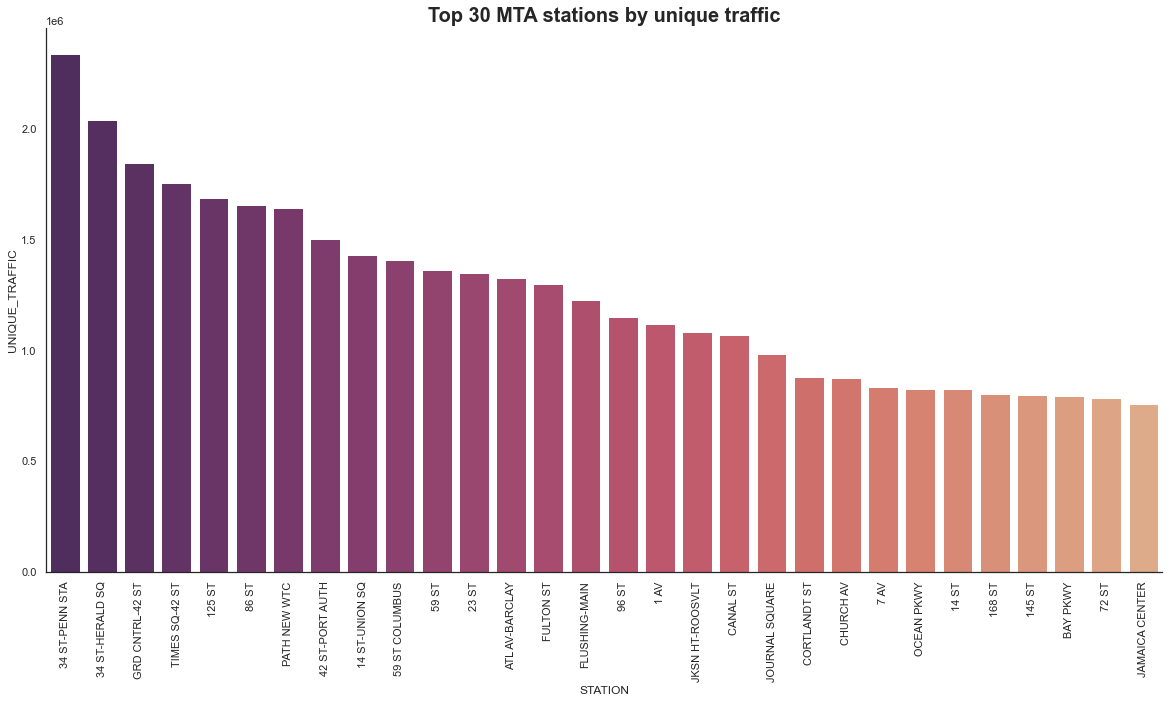

In [938]:
# Plot Top 30 PUMAs by average age
import textwrap
max_width = 3
sns.set(rc={'figure.figsize':(20,10)})

x_traffic = station_condensed_top30['STATION']
y_traffic = station_condensed_top30['UNIQUE_TRAFFIC']
sns.set_style("white")
plot_traffic = sns.barplot(x = x_traffic, y = y_traffic, palette = sns.color_palette('flare_r', 30))
plot_traffic.set_title('Top 30 MTA stations by unique traffic', fontsize = 20, fontweight = 'bold')
plot_traffic.set(xlabel="STATION", ylabel = "UNIQUE_TRAFFIC")
plot_traffic.set_xticklabels(plot_traffic.get_xticklabels(),rotation=90)
sns.despine()

plot_traffic.figure.savefig('/Users/valentinarizzati/Desktop/Images/mta_station_top30_bar.png');

In [424]:
# Export to png for presentation
station_condensed_top30_styled.export_png('/Users/valentinarizzati/Desktop/Images/mta_top30_station.png')

In [955]:
# Create df to filter the stations with HIGH traffic
traffic_high_df = station_all_time_geo[station_all_time_geo['TRAFFIC_LEVEL_UNIQUE_TRAFFIC'] == 'HIGH']
traffic_high_df_lanlot = traffic_high_df[['LAT', 'LON']]

# Create df to filter the stations with MEDIUM traffic
traffic_medium_df = station_all_time_geo[station_all_time_geo['TRAFFIC_LEVEL_UNIQUE_TRAFFIC'] == 'MEDIUM']
traffic_medium_df_lanlot = traffic_medium_df[['LAT', 'LON']]

# Create df to filter the stations with LOW traffic
traffic_low_df = station_all_time_geo[station_all_time_geo['TRAFFIC_LEVEL_UNIQUE_TRAFFIC'] == 'LOW']
traffic_low_df_lanlot = traffic_low_df[['LAT', 'LON']]

# Create HIGH layer so we can customize formatting (stroke color is BLUE)
high_layer = gmaps.symbol_layer(
    traffic_high_df_lanlot, fill_color='rgba(83, 51, 237, 1)',fill_opacity=0.6,
    stroke_color='rgba(83, 51, 237, 1)', scale=2
)

# Create MEDIUM layer so we can customize formatting S(stroke color is ORANGE)
medium_layer = gmaps.symbol_layer(
    traffic_medium_df_lanlot, fill_color='rgba(248, 148, 6, 1)',fill_opacity=0.6,
    stroke_color='rgba(248, 148, 6, 1)', scale=2
)

# Create LOW layer so we can customize formatting (stroke color is RED)
low_layer = gmaps.symbol_layer(
    traffic_low_df_lanlot, fill_color='rgba(214, 69, 65, 1)',fill_opacity=0.6,
    stroke_color='rgba(214, 69, 65, 1)', scale=2
)

fig = gmaps.figure()
fig.add_layer(high_layer)
fig.add_layer(medium_layer)
fig.add_layer(low_layer)
fig

Figure(layout=FigureLayout(height='420px'))

The MTA stations ranking by unique traffic will be compared to the PUMA ranking in the EDA_Spotify_Census_data notebook for the final selection of MTA stations were to run the outdoor campaign.